# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import pickle


from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

from sklearn_som.som import SOM
from minisom import MiniSom

import time

%matplotlib inline
sns.set(color_codes=True)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# pd.set_option('display.memory_usage', None)
# pd.set_option('display.width', None)

# Metadata

| Nomor | Kolom               | Deskripsi                                                                                                    |
|:-------:|:---------------------|:--------------------------------------------------------------------------------------------------------------|
| 1     | Id                  | Id dari masing-masing pasien                                                                                 |
| 2     | Age                 | Usia dari pasien                                                                                             |
| 3     | Gender              | Jenis kelamin dari pasien                                                                                    |
| 4     | Paracetamol         | Obat untuk menurunkan demam serta meredakan nyeri ringan hingga sedang.                                       |
| 5     | Acetaminophen       | Kata lain dari paracetamol, obat untuk menurunkan demam serta meredakan nyeri ringan hingga sedang.          |
| 6     | Aspirin             | Obat pereda nyeri, penurun demam, dan antiinflamasi.                                                          |
| 7     | Ibuprofen           | Digunakan untuk meredakan nyeri, peradangan, dan demam.                                                        |
| 8     | Tylenol             | Nama lain untuk paracetamol (acetaminophen), digunakan untuk meredakan nyeri dan menurunkan demam.            |
| 9     | Diphen              | Digunakan untuk meredakan gejala alergi seperti pilek, bersin, dan gatal-gatal.                               |
| 10    | Bronkaid            | Digunakan dengan guaifenesin untuk meredakan gejala asma dan penyakit paru obstruktif kronis (PPOK).          |
| 11    | Aprocline           | Digunakan untuk meredakan hidung tersumbat dan gejala pilek.                                                  |
| 12    | Pseudophetrine      | Sama seperti aprocline, digunakan untuk meredakan hidung tersumbat dan gejala pilek.                           |
| 13    | Aleve               | Nama lain untuk naproxen, digunakan untuk meredakan nyeri dan peradangan, sering digunakan untuk mengobati arthritis.|
| 14    | Naproxen            | Digunakan untuk meredakan nyeri dan peradangan, sering digunakan untuk mengobati arthritis.                   |
| 15    | Proprinal           | Serupa dengan ibuprofen, digunakan untuk meredakan nyeri dan peradangan.                                      |
| 16    | Addaprin            | Merek dagang untuk ibuprofen, tergolong dalam kategori NSAID (Antiinflamasi nonsteroid).                      |
| 17    | Zebutal             | Digunakan untuk meredakan sakit kepala tension dengan kombinasi butalbital, asam asetosal, dan kafein.       |
| 18    | Meperdine           | Digunakan untuk meredakan nyeri sedang hingga berat, termasuk pascaoperasi.                                    |
| 19    | Abenol              | Merek dagang untuk paracetamol atau acetaminophen.                                                            |
| 20    | Actiprofen          | Digunakan untuk meredakan nyeri dan peradangan, termasuk arthritis.                                            |
| 21    | Vazalore            | Sama seperti aspirin, digunakan untuk meredakan nyeri, peradangan, dan demam.                                  |
| 22    | Year                | Tahun dari data pasien di-inputkan                                                                           |


# Read Data

In [2]:
df = pd.read_csv('Dataset Per-Kelompok/3. Medicine Dataset.csv') # Dataframe yang diberikan

In [3]:
df.head()

,Id,Age,Gender,Paracetamol,Acitaminophen,Aspirin,Ibuprofen,Tylenol,Diphen,Bronkaid,Aprocline,Pseudophetrine,Aleve,Naproxen,Proprinal,Addaprin,Zebutal,Meperdine,Abenol,Actiprofen,Vazalore,Year
0,1,18.0,Male,80.0,30.0,80.0,50.0,50.0,60.0,40.0,30.0,70.0,40.0,90.0,20.0,90.0,50.0,20.0,30.0,80.0,30.0,2019.0
1,2,20.0,Female,60.0,20.0,70.0,40.0,40.0,20.0,30.0,40.0,60.0,30.0,70.0,40.0,80.0,60.0,30.0,40.0,70.0,20.0,2017.0
2,3,15.0,Male,20.0,40.0,50.0,60.0,20.0,70.0,50.0,80.0,30.0,40.0,50.0,30.0,50.0,70.0,50.0,60.0,80.0,30.0,2016.0
3,4,18.0,Female,50.0,30.0,60.0,30.0,30.0,50.0,60.0,60.0,50.0,20.0,60.0,60.0,40.0,80.0,40.0,28.0,67.0,29.0,2019.0
4,5,18.0,Male,30.0,25.0,28.0,34.0,37.0,40.0,80.0,28.0,48.0,50.0,80.0,68.0,89.0,49.0,19.0,29.0,79.0,30.0,2016.0


# Data Understanding

<blockquote> Checking Missing Values In Our Data </blockquote>

In [4]:
total_rows = df.shape[0] # Mendapatkan jumlah banyaknya row

missing_values_count = df.isnull().sum() # Check Missing Value nya
missing_values_percentage = (missing_values_count / total_rows) * 100 # Persentasenya disini

In [5]:
missing_values_percentage

Id                0.000000
Age               0.666667
Gender            0.666667
Paracetamol       0.666667
Acitaminophen     0.666667
Aspirin           0.666667
Ibuprofen         0.666667
Tylenol           0.666667
Diphen            0.666667
Bronkaid          0.666667
Aprocline         0.666667
Pseudophetrine    0.666667
Aleve             0.666667
Naproxen          0.666667
Proprinal         0.666667
Addaprin          0.666667
Zebutal           0.666667
Meperdine         0.666667
Abenol            0.666667
Actiprofen        0.666667
Vazalore          0.666667
Year              0.666667
dtype: float64

In [6]:
df.dropna(inplace = True) # Terlihat hanya sedikit data NaN dari keseluruhan Dataframe

<blockquote> Checking Duplicate In Our Data </blockquote>

In [7]:
df.duplicated().sum() # Tidak ada duplicate data pada Dataframe

0

<blockquote> General Information Of Our Data </blockquote>

In [8]:
# Calculate summary statistics
df_summary = df.describe()
df_summary

,Id,Age,Paracetamol,Acitaminophen,Aspirin,Ibuprofen,Tylenol,Diphen,Bronkaid,Aprocline,Pseudophetrine,Aleve,Naproxen,Proprinal,Addaprin,Zebutal,Meperdine,Abenol,Actiprofen,Vazalore,Year
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,75.959732,28.838926,59.429530,39.624161,60.416107,46.993289,45.120805,52.771812,51.510067,52.785235,51.872483,41.483221,58.463087,39.107383,60.328859,58.691275,47.187919,49.557047,63.959732,45.214765,2017.000000
std,43.224255,15.492399,25.792901,24.026865,20.897465,24.152247,23.377025,25.287835,24.041804,23.699288,23.032377,24.405805,25.995978,21.695416,24.474323,23.420336,25.741010,24.913467,23.383373,28.161351,1.433197
min,1.000000,1.000000,5.000000,3.000000,1.000000,3.000000,6.000000,1.000000,2.000000,3.000000,6.000000,1.000000,3.000000,5.000000,1.000000,2.000000,3.000000,1.000000,4.000000,2.000000,2015.000000
25%,39.000000,18.000000,46.000000,24.000000,50.000000,30.000000,28.000000,35.000000,32.000000,33.000000,30.000000,23.000000,40.000000,20.000000,41.000000,50.000000,26.000000,28.000000,50.000000,29.000000,2016.000000
50%,76.000000,20.000000,60.000000,30.000000,60.000000,41.000000,40.000000,51.000000,50.000000,52.000000,50.000000,40.000000,60.000000,32.000000,61.000000,60.000000,42.000000,45.000000,70.000000,30.000000,2017.000000
75%,113.000000,40.000000,80.000000,49.000000,79.000000,61.000000,59.000000,70.000000,66.000000,71.000000,70.000000,48.000000,81.000000,50.000000,80.000000,80.000000,65.000000,64.000000,80.000000,72.000000,2018.000000
max,150.000000,72.000000,100.000000,98.000000,100.000000,100.000000,100.000000,99.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,100.000000,99.000000,100.000000,2019.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 148
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              149 non-null    int64  
 1   Age             149 non-null    float64
 2   Gender          149 non-null    object 
 3   Paracetamol     149 non-null    float64
 4   Acitaminophen   149 non-null    float64
 5   Aspirin         149 non-null    float64
 6   Ibuprofen       149 non-null    float64
 7   Tylenol         149 non-null    float64
 8   Diphen          149 non-null    float64
 9   Bronkaid        149 non-null    float64
 10  Aprocline       149 non-null    float64
 11  Pseudophetrine  149 non-null    float64
 12  Aleve           149 non-null    float64
 13  Naproxen        149 non-null    float64
 14  Proprinal       149 non-null    float64
 15  Addaprin        149 non-null    float64
 16  Zebutal         149 non-null    float64
 17  Meperdine       149 non-null    flo

# Preprocessing Data

Data sudah bersih jadi tidak perlu di preprocessing Data. Alhamdulillah 🙏

In [10]:
# Mengubah tipe data kolom "Year" dari float menjadi int
df['Year'] = df['Year'].astype(int)

In [11]:
df['Year'].value_counts()

2016    50
2019    36
2018    22
2015    22
2017    19
Name: Year, dtype: int64

In [12]:
df['Gender'].value_counts()

Female    78
Male      71
Name: Gender, dtype: int64

# Insight Data (EDA) + Feature Engineering

## Rata-Rata Usia Berdasarkan Jenis Kelamin Pengguna Obat

In [13]:
# Rata-rata usia dan jenis kelamin pengguna obat
rata_rata_usia_jenis_kelamin = df.groupby('Gender')['Age'].mean().reset_index()
print("Rata-rata Usia dan Jenis Kelamin Pengguna Obat:")
print(rata_rata_usia_jenis_kelamin)

Rata-rata Usia dan Jenis Kelamin Pengguna Obat:
   Gender        Age
0  Female  29.051282
1    Male  28.605634


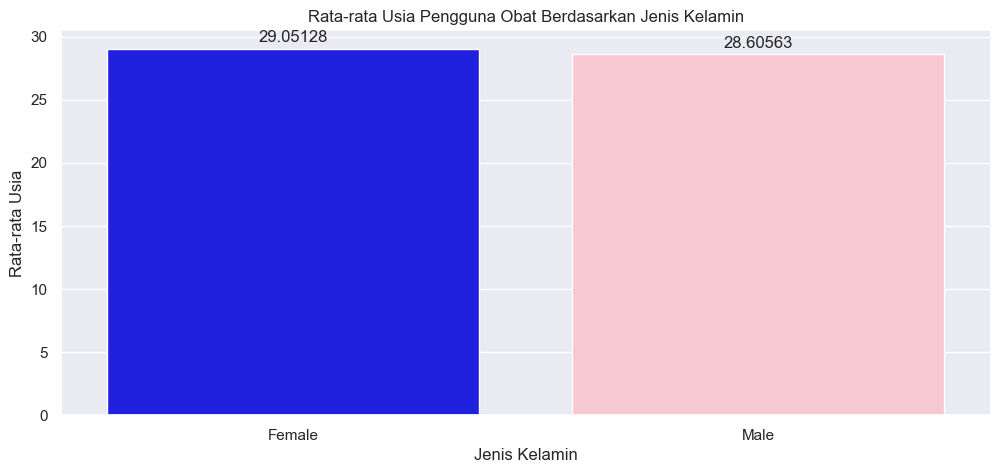

In [14]:
# Plot bar menggunakan seaborn
plt.figure(figsize=(12,5))
ax = sns.barplot(x='Gender', y='Age', data=rata_rata_usia_jenis_kelamin, palette=['blue', 'pink'])

# Menambahkan label pada setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.5f}', (p.get_x() + p.get_width() / 2., p.get_height()-.2),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Rata-rata Usia Pengguna Obat Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Rata-rata Usia')
plt.show()

<blockquote> Berdasarkan histogram di atas, kita dapat mengetahui rata-rata usia dan jenis kelamin pengguna obat dimana pada jenis kelamin laki-laki sebanyak 28.60563 dengan rata-rata usia 28 tahun , begitu juga dengan jenis kelamin perempuan sebanyak 29.05128 dengan rata-rata usia 29 tahun. </blockquote>

## Top 5 Obat Paling Banyak Dikonsumsi

In [15]:
# Menghitung total penggunaan obat
total_penggunaan_obat = df.drop(['Id', 'Age', 'Gender', 'Year'], axis=1).sum()
total_penggunaan_obat = total_penggunaan_obat.reset_index(name='Total Penggunaan')

# Mengurutkan obat berdasarkan total penggunaan secara menurun
top_obat = total_penggunaan_obat.sort_values(by='Total Penggunaan', ascending=False).head(5)
top_obat

,index,Total Penggunaan
16,Actiprofen,9530.0
2,Aspirin,9002.0
12,Addaprin,8989.0
0,Paracetamol,8855.0
13,Zebutal,8745.0


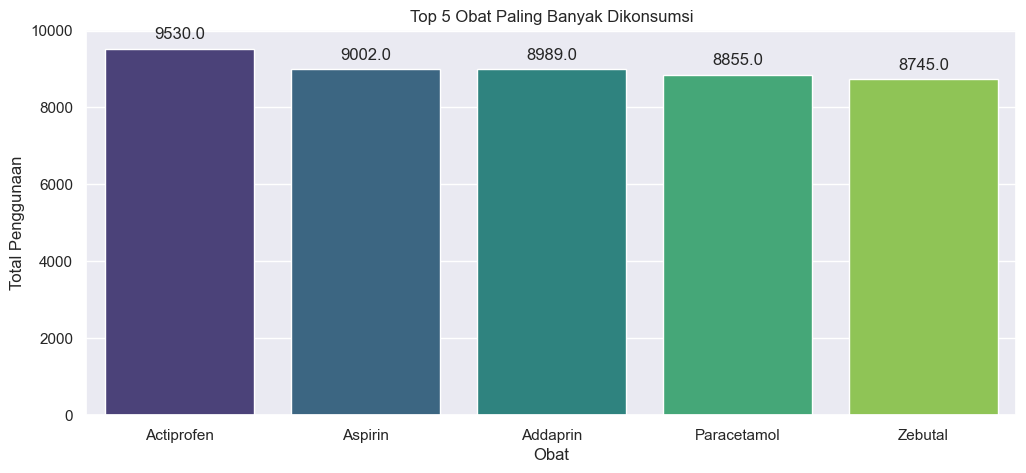

In [16]:
# Plot bar menggunakan seaborn
plt.figure(figsize=(12,5))
ax = sns.barplot(x='index', y='Total Penggunaan', data=top_obat, palette='viridis')

# Menambahkan label pada setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Top 5 Obat Paling Banyak Dikonsumsi')
plt.xlabel('Obat')
plt.ylabel('Total Penggunaan')
plt.show()

<blockquote> Berdasarkan histogram di atas, kita dapat melihat 5 Obat yang paling banyak dikonsumsi. Obat yang paling banyak dikonsumsi yaitu Actiprofen dengan total penggunaan sebesar 9530, Aspirin dengan total penggunaan sebesar 9002, Addaprin dengan total penggunaan sebesar 8989, Paracetamol dengan total penggunaan sebesar 8855, dan Zebutal dengan total penggunaan sebesar 8745. </blockquote>

## Total Penggunaan Obat Setiap Tahunan

In [17]:
total_penggunaan_tahun = df.groupby('Year').sum().drop(['Id', 'Age'], axis=1).reset_index()

C:\Users\rendi\AppData\Local\Temp\ipykernel_10732\4034677293.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_penggunaan_tahun = df.groupby('Year').sum().drop(['Id', 'Age'], axis=1).reset_index()


In [18]:
total_penggunaan_tahun

,Year,Paracetamol,Acitaminophen,Aspirin,Ibuprofen,Tylenol,Diphen,Bronkaid,Aprocline,Pseudophetrine,Aleve,Naproxen,Proprinal,Addaprin,Zebutal,Meperdine,Abenol,Actiprofen,Vazalore
0,2015,1193.0,1037.0,1344.0,1141.0,1097.0,1209.0,1181.0,1156.0,1133.0,1032.0,1151.0,1086.0,1355.0,1278.0,950.0,1255.0,1145.0,1137.0
1,2016,2817.0,1724.0,2855.0,2187.0,2121.0,2550.0,2689.0,2782.0,2513.0,2049.0,2892.0,1895.0,2823.0,3042.0,2520.0,2525.0,3246.0,2072.0
2,2017,1179.0,764.0,1022.0,828.0,842.0,1045.0,892.0,1036.0,1116.0,722.0,1283.0,633.0,1300.0,1118.0,870.0,921.0,1273.0,971.0
3,2018,1395.0,1003.0,1432.0,1085.0,1089.0,1094.0,1062.0,1090.0,1043.0,899.0,1243.0,790.0,1321.0,1213.0,1023.0,991.0,1378.0,1088.0
4,2019,2271.0,1376.0,2349.0,1761.0,1574.0,1965.0,1851.0,1801.0,1924.0,1479.0,2142.0,1423.0,2190.0,2094.0,1668.0,1692.0,2488.0,1469.0


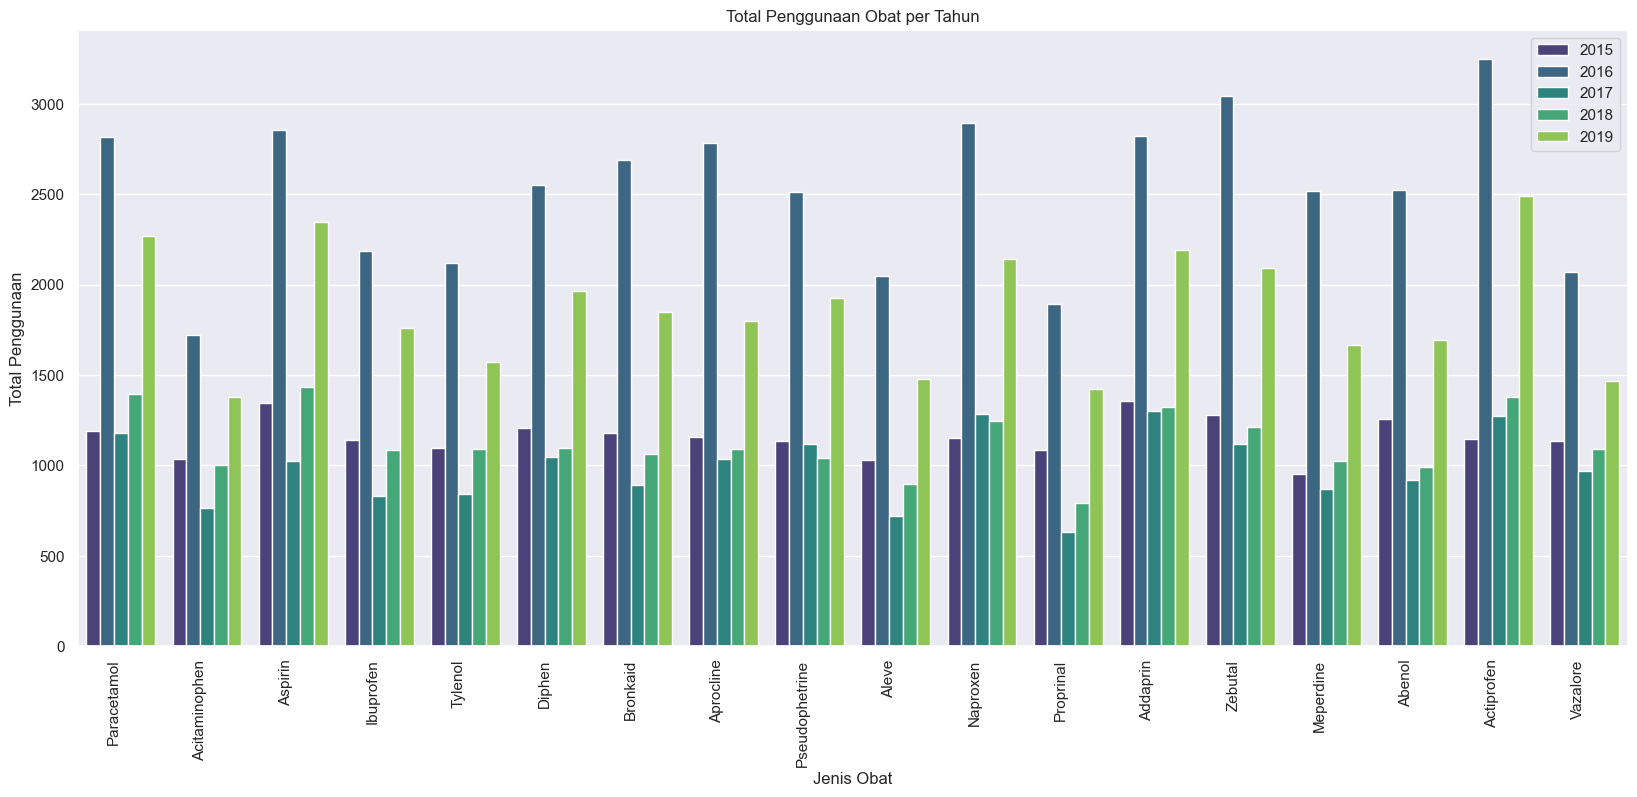

In [19]:
# Melt DataFrame untuk mempermudah plotting
melted_df = total_penggunaan_tahun.melt(id_vars='Year', var_name='Obat', value_name='Total Penggunaan')

# Plot menggunakan vertical bar plot dari Seaborn
plt.figure(figsize=(20, 8))
ax = sns.barplot(x='Obat', y='Total Penggunaan', hue='Year', data=melted_df, palette='viridis')

# Memutar label sumbu x
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

# Menempatkan legend di kanan atas
plt.legend(loc='upper right')

plt.title('Total Penggunaan Obat per Tahun')
plt.xlabel('Jenis Obat')
plt.ylabel('Total Penggunaan')
plt.show()

<blockquote> Berdasarkan histogram di atas, kita dapat mengetahui Total Penggunaan Obat per-Tahun dimana pada tahun 2016 penggunaan seluruh jenis obat mencapai total penggunaan tertinggi dan menduduki posisi pertama, lalu diposisi kedua ada pada tahun 2019 dengan total penggunaan obat per-tahun, dan posisi terendah dalam total penggunaan obat per-tahun terdapat pada tahun 2017. </blockquote>

## Total penggunaan obat tahunan

In [20]:
total_penggunaan_tahunan = df.groupby('Year').sum().reset_index()
print("Total Penggunaan Obat Tahunan:")
total_penggunaan_tahunan

Total Penggunaan Obat Tahunan:


C:\Users\rendi\AppData\Local\Temp\ipykernel_10732\144848683.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_penggunaan_tahunan = df.groupby('Year').sum().reset_index()


,Year,Id,Age,Paracetamol,Acitaminophen,Aspirin,Ibuprofen,Tylenol,Diphen,Bronkaid,Aprocline,Pseudophetrine,Aleve,Naproxen,Proprinal,Addaprin,Zebutal,Meperdine,Abenol,Actiprofen,Vazalore
0,2015,2314,727.0,1193.0,1037.0,1344.0,1141.0,1097.0,1209.0,1181.0,1156.0,1133.0,1032.0,1151.0,1086.0,1355.0,1278.0,950.0,1255.0,1145.0,1137.0
1,2016,3507,1287.0,2817.0,1724.0,2855.0,2187.0,2121.0,2550.0,2689.0,2782.0,2513.0,2049.0,2892.0,1895.0,2823.0,3042.0,2520.0,2525.0,3246.0,2072.0
2,2017,1242,459.0,1179.0,764.0,1022.0,828.0,842.0,1045.0,892.0,1036.0,1116.0,722.0,1283.0,633.0,1300.0,1118.0,870.0,921.0,1273.0,971.0
3,2018,2158,715.0,1395.0,1003.0,1432.0,1085.0,1089.0,1094.0,1062.0,1090.0,1043.0,899.0,1243.0,790.0,1321.0,1213.0,1023.0,991.0,1378.0,1088.0
4,2019,2097,1109.0,2271.0,1376.0,2349.0,1761.0,1574.0,1965.0,1851.0,1801.0,1924.0,1479.0,2142.0,1423.0,2190.0,2094.0,1668.0,1692.0,2488.0,1469.0


<Figure size 1000x600 with 0 Axes>

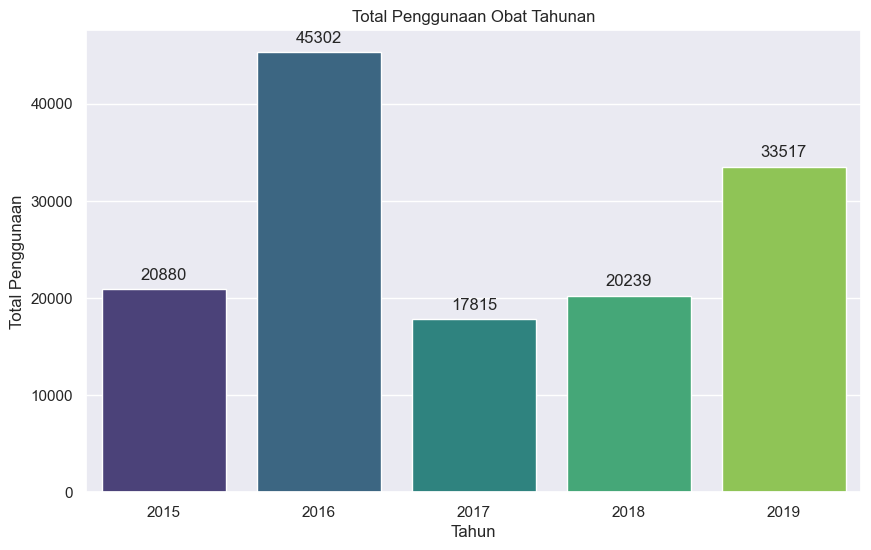

In [21]:
# Plot menggunakan seaborn
plt.figure(figsize=(10, 6))

# Plot menggunakan seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = 'Year', y = total_penggunaan_tahunan.drop(['Id', 'Age', 'Year'], axis=1).sum(axis=1), data=total_penggunaan_tahunan, palette='viridis')

# Menambahkan label pada setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Total Penggunaan Obat Tahunan')
plt.xlabel('Tahun')
plt.ylabel('Total Penggunaan')
plt.show()

<blockquote> Berdasarkan histogram di atas, kita dapat mengetahui Total Penggunaan Obat Tahunan dimana pada tahun 2016 penggunaan mencapai total penggunaan sebesar 45302 dan menduduki posisi pertama, lalu diposisi kedua ada pada tahun 2019 dengan total penggunaan sebesar 33517, diposisi ketiga ada pada tahun 2015 dengan total penggunaan sebesar 20880, selanjutnya diposisi keempat ada pada tahun 2018 dengan total penggunaan sebesar 20239,dan posisi terendah dalam total penggunaan obat per-tahun terdapat pada tahun 2017. </blockquote>

## Distribusi Frekuensi Penyebaran Usia Pengguna Obat

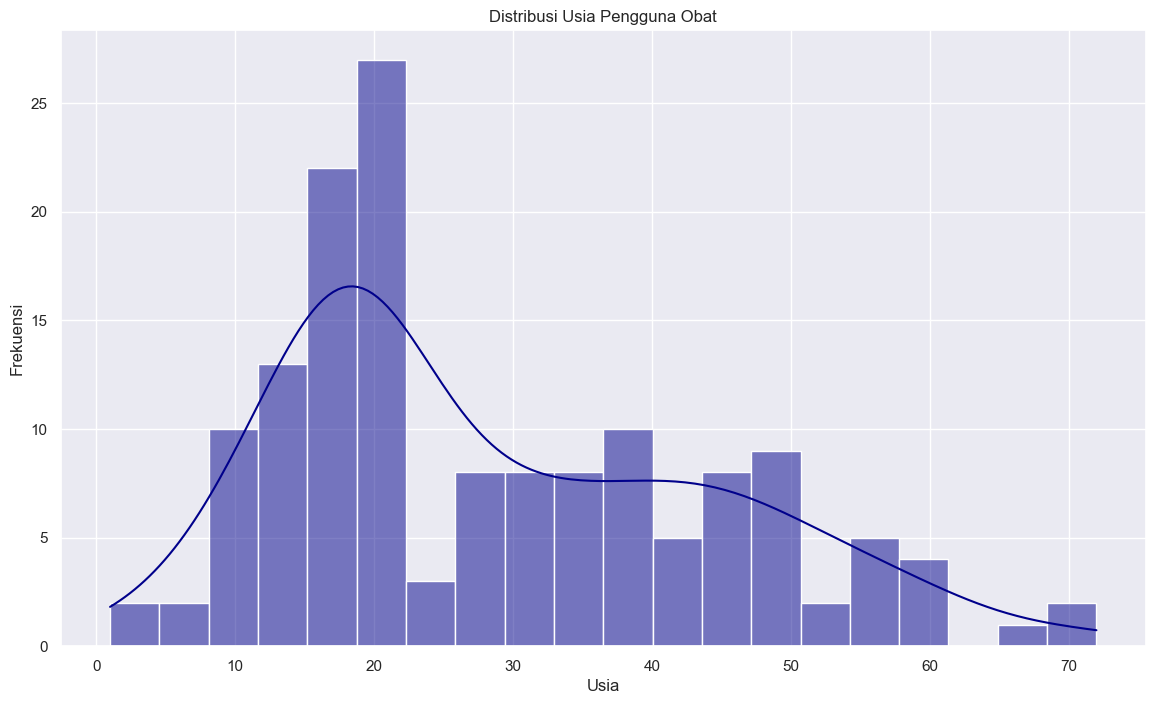

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram distribusi usia pengguna obat
plt.figure(figsize=(14, 8))
sns.histplot(df['Age'], bins=20, kde=True, color='darkblue')

plt.title('Distribusi Usia Pengguna Obat')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

<blockquote>Berdasarkan histogram di atas, kita dapat mengetahui sebaran datanya cenderung Kemiringan data ke arah kanan (condong positif) dimana nilai mean lebih dari nilai modus (mean > modus). MEAN  >  MEDIAN  >  MODUS. Kami juga mendapatkan informasi bahwa dari usia 10 hingga 20 mengalami kenikan dan puncak di usia 20 tahun </blockquote>

## Korelasi Antara Umur dan Penggunaan Obat

In [23]:
df['TotalDrugUsage'] = df.drop(['Id', 'Age', 'Gender', 'Year'], axis=1).sum(axis=1)
age_total_summary = df.groupby('Age').sum().reset_index()

C:\Users\rendi\AppData\Local\Temp\ipykernel_10732\2884379139.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_total_summary = df.groupby('Age').sum().reset_index()


In [24]:
age_total_df = age_total_summary[['Age', 'TotalDrugUsage']]

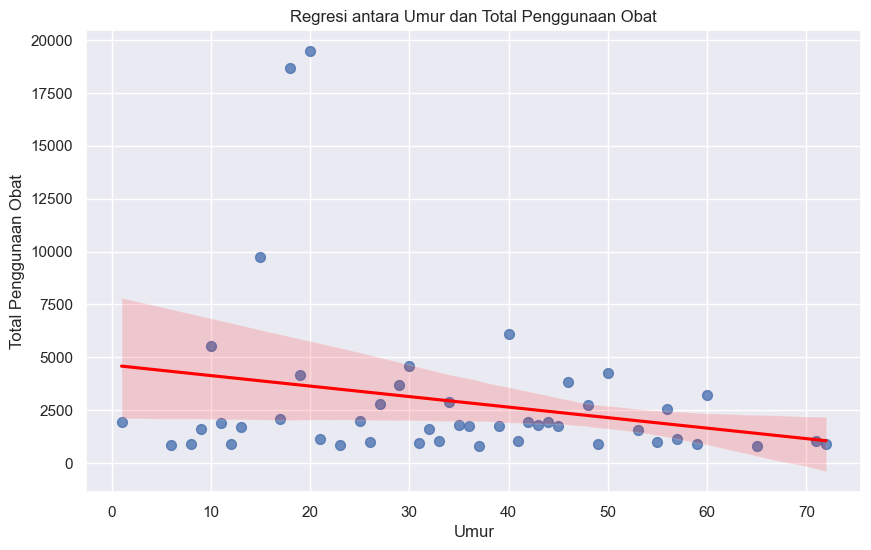

In [25]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='TotalDrugUsage', data=age_total_df, scatter_kws={'s': 50}, line_kws={'color': 'red'})

plt.title('Regresi antara Umur dan Total Penggunaan Obat')
plt.xlabel('Umur')
plt.ylabel('Total Penggunaan Obat')
plt.show()

<blockquote>Berdasarkan Scatterplot di atas, kita dapat mengetahui korelasi antara 2 variabel yakni Umur dan total penggunaan obat yang didapatkan dari menjumlah semua total obat berdasarkan umurnya. jadi disini terlihat bahwa hubungannya negatif korelasi dan tidak ada hubungan antara semakin tua umur maka akan mengkonsumsi semakin banyak obat, diakarenakan pada umur 1 hingga 20 ada beberapa anomali atau outlier data yang cukup aneh pada umur tersebut.</blockquote>

## Pemakaian Obat Berdasarkan Generasi Pengguna

C:\Users\rendi\AppData\Local\Temp\ipykernel_10732\3208792155.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Generation', y='TotalDrugUsage', data=df, palette='viridis', ci=None)


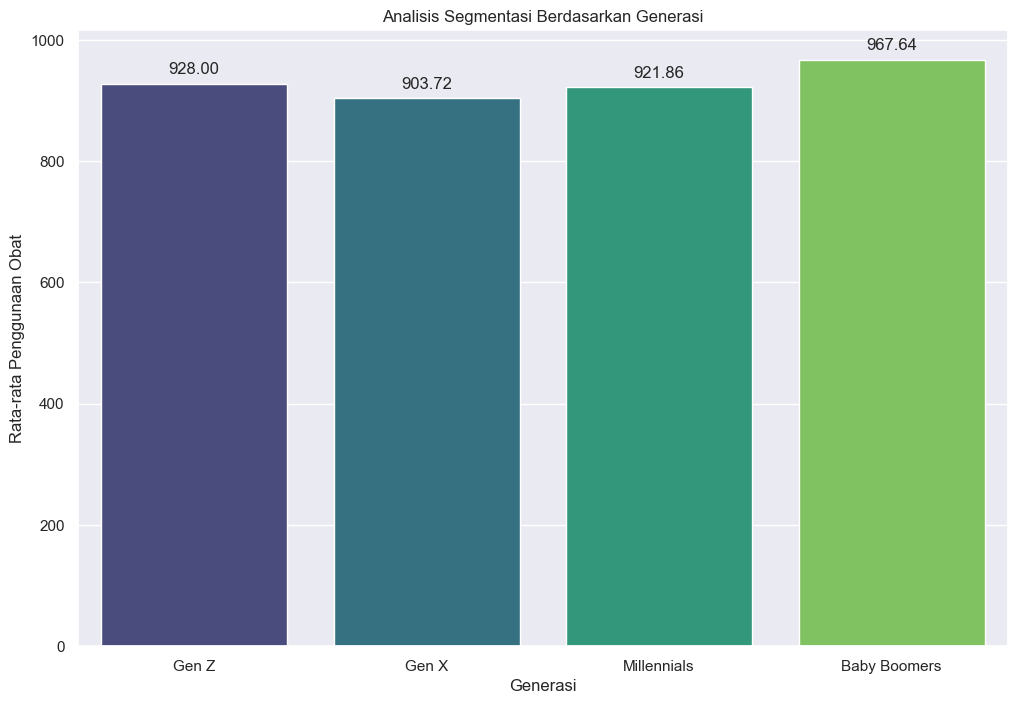

In [26]:
# Fungsi untuk mengelompokkan umur menjadi generasi
def group_age_to_generation(age):
    if 0 <= age < 25:
        return 'Gen Z'
    elif 25 <= age < 40:
        return 'Millennials'
    elif 40 <= age < 56:
        return 'Gen X'
    elif age >= 56:
        return 'Baby Boomers'

# Membuat kolom baru 'Generation' berdasarkan fungsi di atas
df['Generation'] = df['Age'].apply(group_age_to_generation)

# Analisis Segmentasi Berdasarkan Generasi
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Generation', y='TotalDrugUsage', data=df, palette='viridis', ci=None)

# Menambahkan label pada batang diagram
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Analisis Segmentasi Berdasarkan Generasi')
plt.xlabel('Generasi')
plt.ylabel('Rata-rata Penggunaan Obat')
plt.show()


<blockquote>Bar Chart diatas terdiri dari beberapa langkah untuk melakukan analisis segmentasi berdasarkan generasi pada data penggunaan obat. Yang pertama ada fungsi group_age_to_generation yang berfungsi untuk mengambil usia sebagai parameter dan mengembalikan generasi yang sesuai berdasarkan rentang usia yang ditentukan, pada fungsi ini untuk mengelompokkan usia ke dalam kategori generasi tertentu.

Sehingga dari bar chart diatas dilihat bahwa Analisis Segmentasi Berdasarkan Generasi dan Rata-rata Penggunaan Obat yang paling tinggi dari 4 generasi yaitu, generasi Babby Boomers yang mencapai angka 967.64. Pada bar chart diatas, jika warnanya semakin cerah, maka hasilnya lebih tinggi dari yang lainnya.</blockquote>

## Pemakaian Obat Paracetamol Berdasarkan Usia yang telah dikelompokkan

In [27]:
# Misal, membuat bins untuk kelompok usia
bins = [0, 18, 30, 40, 50, 60, 70, 80]
labels = ['0-18', '18-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Melihat pola penggunaan obat berdasarkan kelompok usia
age_group_summary = df.groupby('AgeGroup').mean().reset_index()

C:\Users\rendi\AppData\Local\Temp\ipykernel_10732\2113571184.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_group_summary = df.groupby('AgeGroup').mean().reset_index()


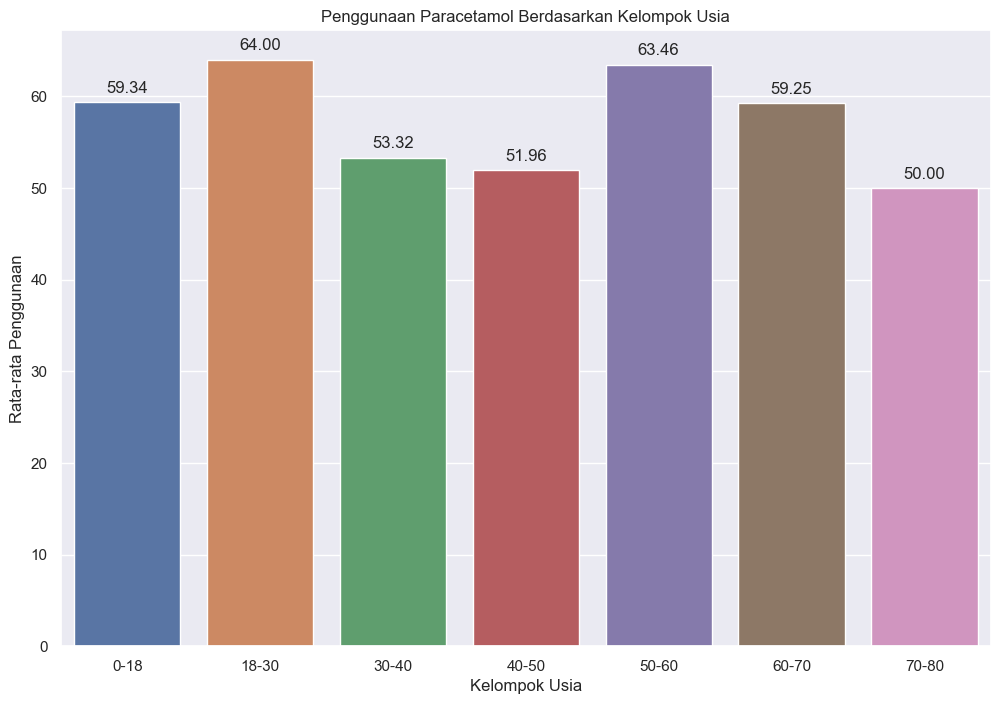

In [28]:
# Plot menggunakan seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='AgeGroup', y='Paracetamol', data=age_group_summary)

# Menambahkan label pada setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.title('Penggunaan Paracetamol Berdasarkan Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Rata-rata Penggunaan')
plt.show()

<blockquote>Bar-chart diatas berfokus pada analisis pola penggunaan obat Paracetamol berdasarkan kelompok usia. Dalam langkah ini, bins (batas kelompok usia) dan labelnya ditentukan. Selanjutnya, kolom baru 'AgeGroup' ditambahkan ke DataFrame (df) dengan menggunakan fungsi cut dari pandas. Hal ini akan mengelompokkan nilai usia ke dalam kelompok usia yang sesuai dengan bins dan labels yang telah ditentukan. Selanjutnya melihat pola penggunaan obat berdasarkan kelompok usia dengen mengelompokkan Dataframe berdasarkan kolom 'AgeGroup' yang berisi rata-rata penggunaan obat Paracetamol untuk setiap kelompok usia.

Sehingga hasil dari bar chartnya menunjukkan penggunaan obat paracetamol terbanyak yaitu pada rentang umur sekitar 18-30 tahun, sedangkan penggunaan obat paracetamol yang paling sedikit yaitu pada rentang umur sekitar 70-80 tahun.</blockquote>

# Select the column that will be used to play

Pilah pilih kolom mana yang akan digunakan, karena untuk Unsupervised Learning Model kita tidak memerlukan target/label untuk data latih

In [29]:
# ubah data kategorik menjadi data numerik
df['Year'].replace([2015, 2016, 2017, 2018, 2019], [0,1,2,3,4], inplace=True)

In [30]:
# ubah data kategorik menjadi data numerik
df['Gender'].replace(['Female', 'Male'], [0,1], inplace=True)

In [31]:
df_selected = df.drop(['Id', 'Gender', 'Year', 'TotalDrugUsage', 'Generation', 'AgeGroup'], axis=1) # Menghapus kolom yang tidak berguna, dan berpotensi menjadi Target

In [32]:
df_selected.head()

,Age,Paracetamol,Acitaminophen,Aspirin,Ibuprofen,Tylenol,Diphen,Bronkaid,Aprocline,Pseudophetrine,Aleve,Naproxen,Proprinal,Addaprin,Zebutal,Meperdine,Abenol,Actiprofen,Vazalore
0,18.0,80.0,30.0,80.0,50.0,50.0,60.0,40.0,30.0,70.0,40.0,90.0,20.0,90.0,50.0,20.0,30.0,80.0,30.0
1,20.0,60.0,20.0,70.0,40.0,40.0,20.0,30.0,40.0,60.0,30.0,70.0,40.0,80.0,60.0,30.0,40.0,70.0,20.0
2,15.0,20.0,40.0,50.0,60.0,20.0,70.0,50.0,80.0,30.0,40.0,50.0,30.0,50.0,70.0,50.0,60.0,80.0,30.0
3,18.0,50.0,30.0,60.0,30.0,30.0,50.0,60.0,60.0,50.0,20.0,60.0,60.0,40.0,80.0,40.0,28.0,67.0,29.0
4,18.0,30.0,25.0,28.0,34.0,37.0,40.0,80.0,28.0,48.0,50.0,80.0,68.0,89.0,49.0,19.0,29.0,79.0,30.0


In [33]:
Ground_truth_label_gender = df['Gender']
Ground_truth_label_year = df['Year']

# let's Play Unsupervised Learning on DataFrame

## K-Means Clustering

- Clustering itu tidak memperhatikan balancing terhadap class, Jadi tidak memerlukan Oversampling.
- K-means memperhatikan datanya harus numerik dan tidak string, jika string maka harus di encoding terlebih dahulu.
- Untuk membuat algoritma lebih smooth, skala data harus diseragamkan, teknik penyeragaman bisa menggunakan min max scaler atau standart scaller
- Berpengaruh terhadap adanya Outlier. Namun Setelah skala diseragamkan, outlier bisa diabaikan

### Check Distribusi Data

Dalam evaluasi distribusi data pada setiap kolom, kami menggunakan beberapa metode statistik deskriptif. 
- Rata-rata (mean) memberikan gambaran tentang nilai tengah distribusi, 
- sementara median menilai pusat distribusi, 
- Skewness yang mengukur sejauh mana distribusi data condong atau asimetris, dapat diidentifikasi melalui nilai positif (ekor panjang di sebelah kanan nilai pusat) atau negatif (ekor panjang di sebelah kiri nilai pusat). 

Jika nilai mean dan median mirip, hal ini mengindikasikan kemungkinan simetri distribusi, sementara nilai skewness yang signifikan positif atau negatif dapat mengungkapkan adanya asimetri dalam distribusi tersebut.

In [34]:
statistics_data = []

for column in df_selected.columns:
    if df_selected[column].dtype in ['int64', 'float64']:
        column_stats = {
            "Nama Kolom": column,
            "Mean": df_selected[column].mean(),
            "Median": df_selected[column].median(),
            "Skewness": df_selected[column].skew()
        }
        statistics_data.append(column_stats)

# Dataframe yang menampung Statitics Data
statistics_df = pd.DataFrame(statistics_data)

In [35]:
statistics_df.head()

,Nama Kolom,Mean,Median,Skewness
0,Age,28.838926,20.0,0.679339
1,Paracetamol,59.429530,60.0,-0.381523
2,Acitaminophen,39.624161,30.0,1.164045
3,Aspirin,60.416107,60.0,-0.553903
4,Ibuprofen,46.993289,41.0,0.435196


### Check Outlier Data

Untuk mendeteksi outlier pada setiap kolom, Kami menggunakan metode $IQR$ (Interquartile Range). Metode ini melibatkan perhitungan nilai $Q1$ (kuartil pertama), $Q3$ (kuartil ketiga), dan $IQR$ (selisih antara $Q3$ dan $Q1$). 

Outlier kemudian didefinisikan sebagai nilai di luar rentang ${Lower Fence} = Q1 - 1.5 \times {IQR}$ dan ${Upper Fence} = Q3 + 1.5 \times {IQR}$

Jadi, metode yang digunakan untuk mendeteksi outlier adalah metode IQR (Interquartile Range).

In [36]:
import pandas as pd

# Assuming df is your DataFrame
outliers_data = []

for column in df_selected.columns:
    if df[column].dtype in ['int64', 'float64']:
        Q1 = df_selected[column].quantile(0.25)
        Q3 = df_selected[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR
        column_outliers = df_selected[(df_selected[column] < lower_fence) | (df_selected[column] > upper_fence)]
        
        outliers_data.append({
            "Nama Kolom": column,
            "Outliers Count": len(column_outliers),
        })

# Create a new DataFrame for the outliers
outliers_df = pd.DataFrame(outliers_data)

In [37]:
outliers_df.head()

,Nama Kolom,Outliers Count
0,Age,0
1,Paracetamol,0
2,Acitaminophen,13
3,Aspirin,2
4,Ibuprofen,0


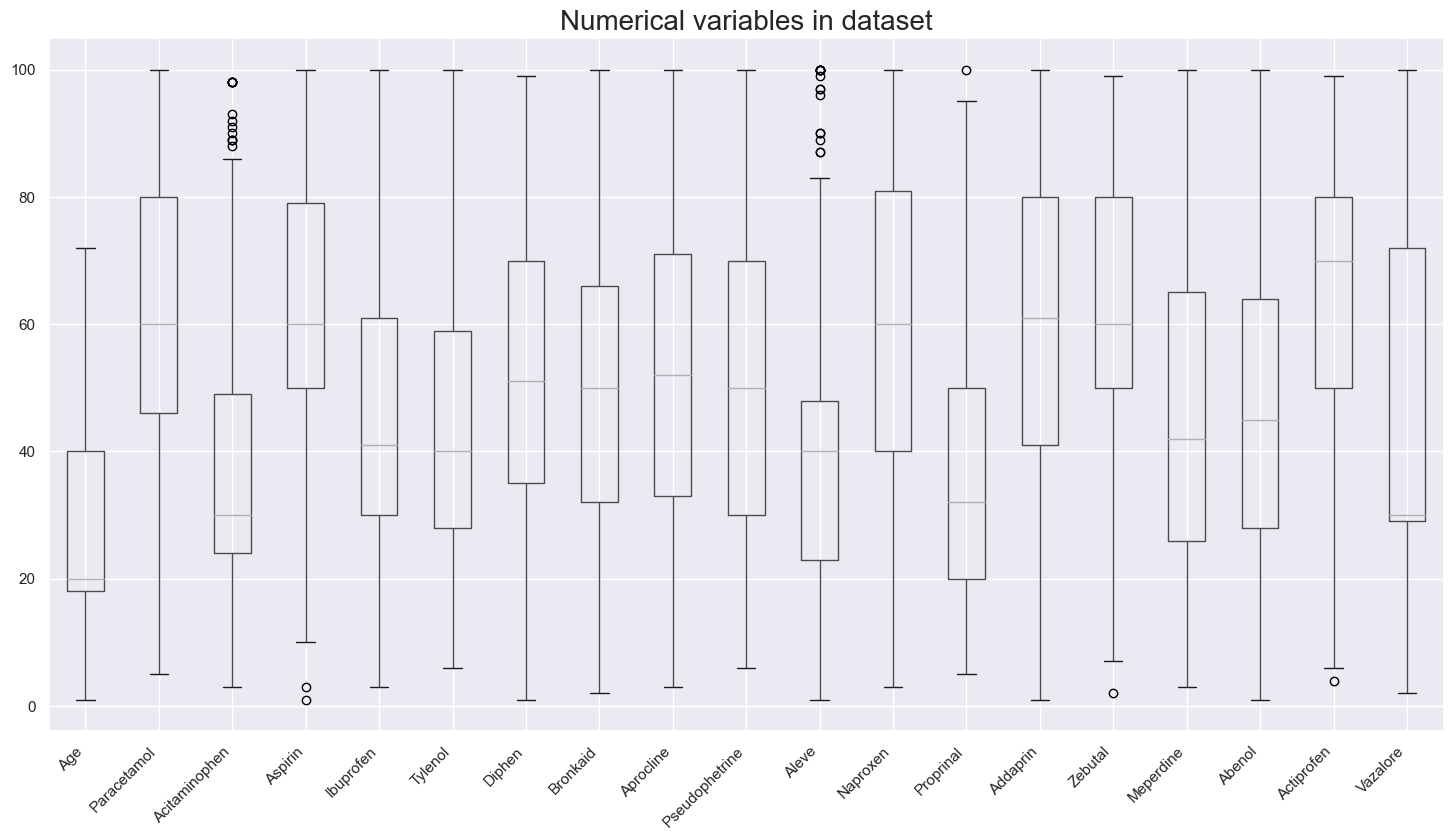

In [38]:
num_cols = df_selected.columns
plt.figure(figsize=(18,9))
df_selected[num_cols].boxplot()# Menggunakan boxplot

# Mengatur label sumbu x
plt.xticks(rotation=45, ha='right')  # Mengatur rotasi dan alignment label
plt.title("Numerical variables in dataset", fontsize=20)
plt.show()


<blockquote> Pada tahapan diatas menampilkan bagaimana cara cek outlier pada data menggunakan 2 cara yakni, Metode IQR dan bisa menggunakan bantuan Boxplot. Kenapa kita perlu mengecek outlier?? hal tersebut karena untuk Clustering sendiri akan sangat berpengaruh pada rentang dari sebuah persebaran data. jadi outlier tersebut akan menggagu kinerja model. lalu disini saya memutuskan melakukan Standarisasi. karena dapat memitigasi dampak tersebut.</blockquote>

### Data Uniformization - Standarisasi

Menggunakan Standarisasi (Standardization) tidak secara langsung mengatasi outlier, tetapi dapat membantu memitigasi dampaknya. Berikut adalah rumus standarisasi:

$ X_{\text{standardized}} = \frac{X - \mu}{\sigma}$

- $(X_{\text{standardized}})$ adalah nilai yang telah distandardisasi,
- $(X)$ adalah nilai asli,
- $(\mu)$ adalah rata-rata dari variabel,
- $(\sigma)$ adalah deviasi standar dari variabel.

In [39]:
scaler = StandardScaler() #Object Scaler

In [40]:
cols = df_selected.columns
X_scaled_data_std = scaler.fit_transform(df_selected)
X_scaled_data_std = pd.DataFrame(X_scaled_data_std, columns = [cols])
# original_data = scaler.inverse_transform(scaled_data)

In [41]:
X_scaled_data_std.head()

,Age,Paracetamol,Acitaminophen,Aspirin,Ibuprofen,Tylenol,Diphen,Bronkaid,Aprocline,Pseudophetrine,Aleve,Naproxen,Proprinal,Addaprin,Zebutal,Meperdine,Abenol,Actiprofen,Vazalore
0,-0.701988,0.800214,-0.401909,0.940303,0.124910,0.209421,0.286801,-0.480367,-0.964674,0.789699,-0.060978,1.217237,-0.883681,1.216426,-0.372351,-1.059773,-0.787647,0.688283,-0.542093
1,-0.572457,0.022192,-0.819514,0.460162,-0.290527,-0.219792,-1.300323,-0.897712,-0.541297,0.354064,-0.472099,0.445293,0.041282,0.806457,0.056068,-0.669977,-0.384903,0.259186,-0.898388
2,-0.896285,-1.533853,0.015695,-0.500120,0.540346,-1.078218,0.683581,-0.063022,1.152210,-0.952844,-0.060978,-0.326652,-0.421200,-0.423452,0.484488,0.109614,0.420583,0.688283,-0.542093
3,-0.701988,-0.366819,-0.401909,-0.019979,-0.705963,-0.649005,-0.109980,0.354323,0.305456,-0.081572,-0.883219,0.059321,0.966245,-0.833421,0.912907,-0.280182,-0.868195,0.130457,-0.577723
4,-0.701988,-1.144842,-0.610712,-1.556430,-0.539789,-0.348556,-0.506761,1.189013,-1.049349,-0.168699,0.350142,0.831265,1.336230,1.175429,-0.415193,-1.098752,-0.827921,0.645373,-0.542093


### K-Means Here🤩 Without PCA

Jadi pada k-means PCA di tahap ini kita menggunakan beberapa langkah garis besarnya sebagai berikut:

| Langkah | Deskripsi |
|----------|----------|
| Ke - 1 | Ambil data numerik(int, float) dari data Medicine Dataset.csv |
| Ke - 2 | Build Model K-Means |
| Ke - 3 | K-Means (n_clusters = 2, n_clusters = 5) |
| Ke - 4 | Check hasil label dan Centroid |
| Ke - 5 | Build Model dengan n_cluster = 1-15 |
| Ke - 6 | Kalkulasi Elbow berdasarkan Inersia setiap n_cluster |
| Ke - 7 | Plot hasil Elbow of K-Means |

In [42]:
from sklearn.cluster import KMeans

In [43]:
# # Parameter grid for GridSearchCV
# param_grid = {
#     'n_clusters': np.arange(2,6),  # Coba nilai k dari 2 hingga 10
#     'init': ['k-means++',],
#     'n_init': [10, 20, 30],
#     'max_iter': [200,300],
#     'tol': [0.001],
#     'algorithm': ['auto']
# }

# # Inisialisasi model KMeans
# kmeans = KMeans()

# start = time.time()
# # Inisialisasi GridSearchCV
# grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=5)
# end = time.time()

# durasi = end - start
# # Melakukan fitting pada data
# grid_search.fit(X_scaled_data_std)

# # Save the model to a file
# with open('kmeans_model.pkl', 'wb') as file:
#     pickle.dump(grid_search, file)
    
# # Load the model from the file
# with open('kmeans_model.pkl', 'rb') as file:
#     loaded_model_kmeans = pickle.load(file)

#### Use 2 Clusters 👨‍💻

- Yang kami harapkan adalah kmeans dapat clustering data berdasarkan nilai Ground truth dari label "Gender". 
- Kenapa n = 2, karena jumlah Unique data dari "Gender" adalah 2

In [44]:
km_2 = KMeans(n_clusters = 2, init = 'k-means++', n_init = 'auto', max_iter = 500, tol = 0.0001)

In [45]:
km_2.fit(X_scaled_data_std)

C:\Users\rendi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=500, n_clusters=2, n_init='auto')

In [46]:
km_2.labels_ # Adalah hasil kerja dari model 'km_2'

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

1. Algoritma K-Means mengelompokkan data dengan mencoba memisahkan sample ke dalam n kelompok dengan varian yang sama, meminimalkan kriteria yang dikenal dengan inersia.
2. Inersia merupakan Jumlah kuadrat jarak sampel ke pusat cluster terdekatnya, ditimbang berdasarkan bobot sampel jika tersedia.
3. Kita dapat melihat ada dimana centroid dari masing-masing cluster.

In [47]:
km_2.cluster_centers_ # Centroid yang berubah-ubah setiap Iterasi

array([[ 0.01770162, -0.06474018,  0.11796569, -0.14785326,  0.09354009,
        -0.06168359,  0.22242495,  0.37604209,  0.35557034, -0.24426868,
        -0.01441259, -0.4144801 ,  0.20031887, -0.46235704,  0.18896577,
         0.19234569,  0.27880072, -0.20406334,  0.11050685],
       [-0.03401488,  0.1244027 , -0.22667918,  0.28411019, -0.1797437 ,
         0.11852926, -0.4274048 , -0.72259067, -0.6832528 ,  0.46937904,
         0.02769477,  0.79645195, -0.38492647,  0.88845078, -0.36311069,
        -0.36960543, -0.53573471,  0.39212171, -0.21234649]])

In [48]:
km_2.inertia_ # Semakin kecil semakin baik. Karena semakin kecil berarti data sample semakin terpusat ke satu centroid terdekat

2527.5059531517745

In [49]:
hasil_km_2 = km_2.predict(X_scaled_data_std)

In [50]:
hasil_km_2 # Adalah hasil Predict dari model 'km_2'

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

pada metode K-means Clustering, jika data train model dan data predictnya sama, maka akan menghasilkan label yang sama. Namun jika berbeda maka hasil akan beda. Pada kasus kali ini data keduanya sama, jadi tidak ada perbedaan menggunaan sebelum dan sesudah predict

#### Evaluate Model - Accuracy

In [51]:
acc_km_2 = metrics.accuracy_score(Ground_truth_label_gender,hasil_km_2)

In [52]:
acc_km_2

0.5302013422818792

#### Use 5 Clusters 👨‍💻

- Yang kami harapkan adalah kmeans dapat clustering data berdasarkan nilai Ground truth dari label "Year". 
- Kenapa n = 5, karena jumlah Unique data dari "Year" adalah 5

In [53]:
km_5 = KMeans(n_clusters = 5, init = 'k-means++', n_init = 'auto', max_iter = 500, tol = 0.0001)

In [54]:
km_5.fit(X_scaled_data_std)

C:\Users\rendi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=500, n_clusters=5, n_init='auto')

In [55]:
km_5.labels_ # Adalah hasil kerja dari model 'km_2'

array([3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 4, 3, 3, 3, 0, 3, 3, 3,
       0, 4, 3, 0, 0, 3, 3, 3, 3, 3, 1, 3, 3, 0, 3, 3, 0, 3, 3, 1, 0, 3,
       3, 3, 0, 3, 1, 3, 0, 3, 3, 1, 0, 3, 3, 3, 0, 3, 1, 3, 0, 3, 3, 1,
       0, 3, 3, 3, 0, 3, 1, 3, 0, 3, 3, 1, 0, 3, 3, 3, 0, 3, 1, 3, 0, 3,
       3, 1, 3, 3, 3, 1, 0, 3, 1, 3, 3, 0, 3, 2, 1, 3, 1, 4, 3, 2, 0, 1,
       2, 0, 2, 4, 1, 4, 2, 2, 1, 0, 4, 3, 3, 3, 1, 1, 3, 3, 3, 2, 4, 3,
       3, 1, 1, 2, 4, 3, 4, 3, 4, 3, 2, 3, 3, 2, 0, 3, 3])

1. Algoritma K-Means mengelompokkan data dengan mencoba memisahkan sample ke dalam n kelompok dengan varian yang sama, meminimalkan kriteria yang dikenal dengan inersia.
2. Inersia merupakan Jumlah kuadrat jarak sampel ke pusat cluster terdekatnya, ditimbang berdasarkan bobot sampel jika tersedia.
3. Kita dapat melihat ada dimana centroid dari masing-masing cluster.

In [56]:
km_5.cluster_centers_ # Centroid yang berubah-ubah setiap Iterasi

array([[-1.02307891e-01, -8.29851859e-02, -3.64788902e-01,
        -1.48016576e-01,  7.72115166e-02, -8.76328877e-01,
         5.79242732e-01,  5.13532502e-01,  7.55490128e-01,
        -9.10893465e-01,  5.67883841e-01, -5.76818933e-01,
        -2.41345634e-01, -4.14341329e-01,  4.22604929e-01,
         2.03453233e-01,  4.95164779e-01,  6.37426629e-01,
         5.43696324e-02],
       [ 7.21134365e-02,  2.16697508e-01,  1.17113440e-01,
        -3.76655078e-01,  9.73587376e-01,  7.49003717e-01,
         7.10033433e-01,  8.19364690e-01,  2.24813173e-01,
        -1.45880199e-01, -2.33257350e-01, -9.42369404e-01,
         7.50420069e-01,  1.58314541e-01, -6.63372353e-02,
         1.47946597e+00,  1.14552030e+00, -4.96841521e-01,
         1.16981566e+00],
       [ 8.20000562e-01, -1.19930322e+00,  1.38961403e+00,
        -1.49881284e+00,  2.41232033e-01,  6.51511013e-01,
        -6.97215728e-01,  3.87710711e-01, -2.83037281e-01,
         2.97431043e-01,  1.04082470e+00,  1.30038984e-02,
    

In [57]:
km_5.inertia_ # Semakin kecil semakin baik. Karena semakin kecil berarti data sample semakin terpusat ke satu centroid terdekat

2137.590187317875

In [58]:
hasil_km_5 = km_5.predict(X_scaled_data_std)

In [59]:
hasil_km_5 # Adalah hasil Predict dari model 'km_2'

array([3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 4, 3, 3, 3, 0, 3, 3, 3,
       0, 4, 3, 0, 0, 3, 3, 3, 3, 3, 1, 3, 3, 0, 3, 3, 0, 3, 3, 1, 0, 3,
       3, 3, 0, 3, 1, 3, 0, 3, 3, 1, 0, 3, 3, 3, 0, 3, 1, 3, 0, 3, 3, 1,
       0, 3, 3, 3, 0, 3, 1, 3, 0, 3, 3, 1, 0, 3, 3, 3, 0, 3, 1, 3, 0, 3,
       3, 1, 3, 3, 3, 1, 0, 3, 1, 3, 3, 0, 3, 2, 1, 3, 1, 4, 3, 2, 0, 1,
       2, 0, 2, 4, 1, 4, 2, 2, 1, 0, 4, 3, 3, 3, 1, 1, 3, 3, 3, 2, 4, 3,
       3, 1, 1, 2, 4, 3, 4, 3, 4, 3, 2, 3, 3, 2, 0, 3, 3])

pada metode K-means Clustering, jika data train model dan data predictnya sama, maka akan menghasilkan label yang sama. Namun jika berbeda maka hasil akan beda. Pada kasus kali ini data keduanya sama, jadi tidak ada perbedaan menggunaan sebelum dan sesudah predict

#### Evaluate Model - Accuracy

In [60]:
acc_km_5 = metrics.accuracy_score(Ground_truth_label_year,hasil_km_5)

In [61]:
acc_km_5

0.16778523489932887

#### Let's See The Elbow of Kmeans

In [62]:
inersia_values = []
for i in range(1, 16):
    kmeans_std = KMeans(n_clusters = i, init = 'k-means++', n_init = 'auto', max_iter = 500, tol = 0.0001)
    kmeans_std.fit(X_scaled_data_std)
    inersia_values.append(kmeans_std.inertia_)

C:\Users\rendi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rendi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rendi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rendi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

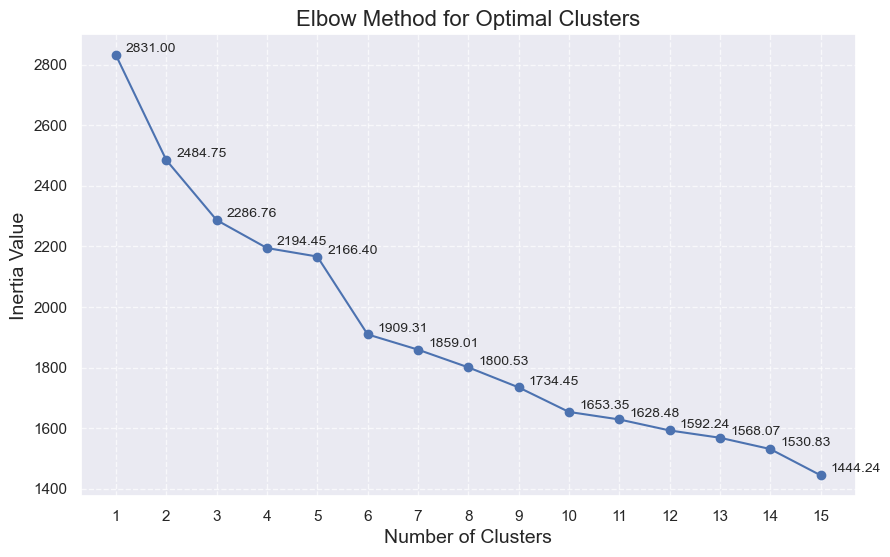

In [63]:
# Plot Elbow Method with Labels
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), inersia_values, marker='o', linestyle='-', color='b')

# Menambahkan label untuk setiap titik data
for i, inertia in enumerate(inersia_values):
    plt.text(i + 1.2, inertia, f'{inertia:.2f}', ha='left', va='bottom', fontsize=10)

plt.title('Elbow Method for Optimal Clusters', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Inertia Value', fontsize=14)
plt.xticks(range(1, 16))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<blockquote> Semakin kecil nilai inersia maka semakin baik sebuah model k-means dalam menentukan sebuah sample data masuk kedalam centroid mana, dalam kasus ini semakin banyak jumlah cluster maka semakin kecil pula inersia. Namun hal tersebut adalah hal wajar karena semakin banyak cluster maka centroid yang dibangkitkan semakin banyak. jadi untuk penentuan n_sample adalah tergantung pada tujuan anda ingin mengcluster kemana. </blockquote>

## PCA (Principal Component Analysis) Manual Here 🤩

PCA kali ini digunakan untuk mereduksi dimensi dari Dataset yang sudah diClustering Oleh K-means diatas. Kenapa di PCA?? karena plot Hanya bisa menggunakan Maksimal 3D, dan atau 2D lebih dari itu belum bisa. maka dari itu kali ini akan di Reduksi dari 19 Dim menjadi 2 Dim, dan tentunya berharap 2 tersebut bisa mewakili informasi dari 19 dim yang ada.

### Cek Korelasi Antar Kolom

In [64]:
korelasi = X_scaled_data_std.corr()

### Standarisasi

Kami gunakan data yang sebelumnya sudah distandarisasikan pada saat ingin melakukan K-means Clustering

In [65]:
X_scaled_data_std.head()

,Age,Paracetamol,Acitaminophen,Aspirin,Ibuprofen,Tylenol,Diphen,Bronkaid,Aprocline,Pseudophetrine,Aleve,Naproxen,Proprinal,Addaprin,Zebutal,Meperdine,Abenol,Actiprofen,Vazalore
0,-0.701988,0.800214,-0.401909,0.940303,0.124910,0.209421,0.286801,-0.480367,-0.964674,0.789699,-0.060978,1.217237,-0.883681,1.216426,-0.372351,-1.059773,-0.787647,0.688283,-0.542093
1,-0.572457,0.022192,-0.819514,0.460162,-0.290527,-0.219792,-1.300323,-0.897712,-0.541297,0.354064,-0.472099,0.445293,0.041282,0.806457,0.056068,-0.669977,-0.384903,0.259186,-0.898388
2,-0.896285,-1.533853,0.015695,-0.500120,0.540346,-1.078218,0.683581,-0.063022,1.152210,-0.952844,-0.060978,-0.326652,-0.421200,-0.423452,0.484488,0.109614,0.420583,0.688283,-0.542093
3,-0.701988,-0.366819,-0.401909,-0.019979,-0.705963,-0.649005,-0.109980,0.354323,0.305456,-0.081572,-0.883219,0.059321,0.966245,-0.833421,0.912907,-0.280182,-0.868195,0.130457,-0.577723
4,-0.701988,-1.144842,-0.610712,-1.556430,-0.539789,-0.348556,-0.506761,1.189013,-1.049349,-0.168699,0.350142,0.831265,1.336230,1.175429,-0.415193,-1.098752,-0.827921,0.645373,-0.542093


### Hitung Covariance Matrix

In [66]:
mean_vector = np.mean(X_scaled_data_std, axis = 0)
cov_matrix = (X_scaled_data_std-mean_vector).T.dot((X_scaled_data_std-mean_vector))/(X_scaled_data_std.shape[0]-1)
# cov_matrix = np.cov(X_scaled_data_std, rowvar=False)

### Mencari Nilai Engien dan Vektor Eigen

In [67]:
eig_values, eig_vectors = np.linalg.eig(cov_matrix)
eig_values # Hasil Eigen Value untuk Setiap Kolom yang ada

array([3.21224793, 2.11222899, 1.72540698, 1.48652846, 1.17193278,
       0.24013772, 0.30732117, 1.07343504, 0.44978948, 0.47296906,
       0.49661386, 0.55977522, 0.65203836, 0.66761125, 0.74820826,
       1.01204531, 0.97007029, 0.88210159, 0.88791663])

### Memilih Principal Component nya

Pilih yang memiliki eigen value tertinggi, berdasarkan explained_variance_ratio_

In [68]:
eigen_tuple = (eig_values, eig_vectors) # Memasangkan nilai Eigen Value dan Eigen Vektornya

In [69]:
eigen_tuple = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

In [70]:
eigen_tuple.sort(key=lambda x: x[0], reverse=True) # urutkan dari yang tertinggi untuk nilai Eigen Values nya

In [71]:
# Menampilkan nilai eigen dan vektor eigen yang telah diurutkan
for i in range(len(eigen_tuple)):
    val, vec = eigen_tuple[i]
    print(f'Eigenvalue {i+1}: {val}, Eigenvector: {vec}')

Eigenvalue 1: 3.212247933270241, Eigenvector: [-0.08324312  0.04861063 -0.14556442  0.19932614 -0.15909437 -0.13147828
 -0.11435165 -0.31305594 -0.23278054  0.21244658 -0.12182757  0.40436496
 -0.29675647  0.16996538 -0.0023974  -0.31254937 -0.39136637  0.20092998
 -0.30041723]
Eigenvalue 2: 2.1122289929520925, Eigenvector: [ 0.22659148 -0.20837391  0.29999148 -0.15184721  0.05324331  0.31296962
 -0.32852955 -0.2725839  -0.28551751  0.29151637  0.04458799  0.04844343
  0.32951421  0.19397977 -0.19448877 -0.06716891  0.01013668 -0.38490242
 -0.03912583]
Eigenvalue 3: 1.7254069774975864, Eigenvector: [-0.077835    0.20713494 -0.11466423  0.36516046  0.12255323  0.26083502
  0.10961739  0.05993408 -0.23424399  0.21795055  0.31239326 -0.01987374
 -0.07730045  0.36447817 -0.25991575  0.15427134  0.06823725  0.25159283
  0.45540805]
Eigenvalue 4: 1.4865284630009143, Eigenvector: [-0.07921309 -0.16477352  0.12514629  0.11685917  0.59159577  0.02329461
  0.38814565 -0.03426278  0.1285508   0.1

### Explained Variance

In [72]:
tot = sum(eig_values)
var_exp = [(i/tot)*100 for i in sorted(eig_values, reverse = True)]

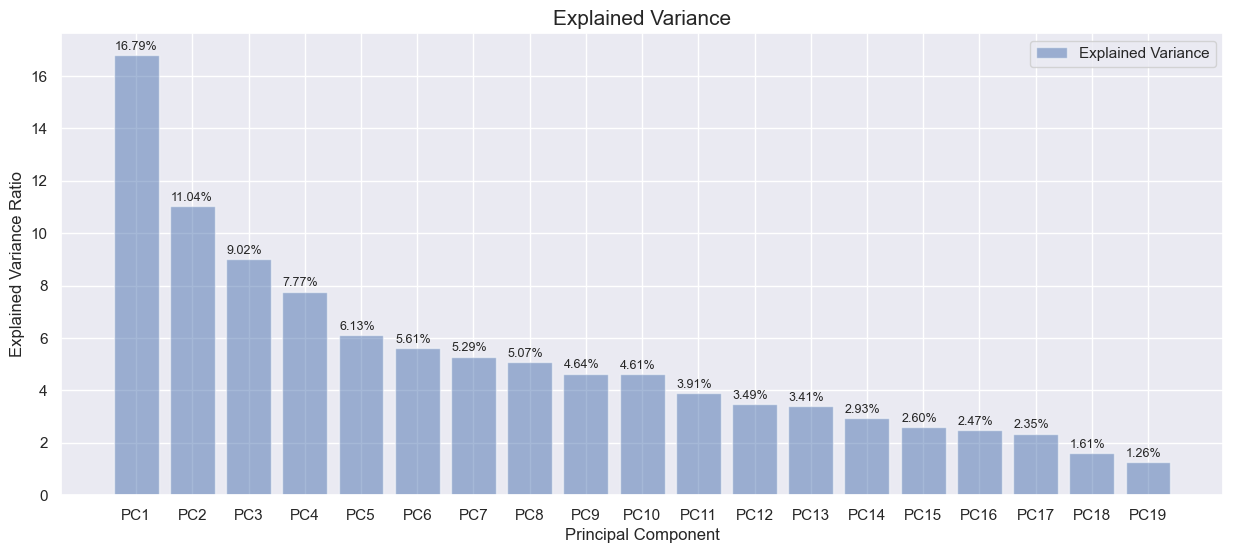

In [73]:
plt.figure(figsize=(15, 6))
bars = plt.bar(range(19), var_exp, alpha=0.5, align='center', label='Explained Variance')

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance', fontsize=15)
plt.legend(loc="best")

# Adding labels to each bar
plt.xticks(range(19), [f'PC{i+1}' for i in range(19)])

# Adding data labels to each bar
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.39, bar.get_height() + 0.2, f'{var_exp[i]:.2f}%', fontsize=9)

plt.show()

### Hitung Matriks W

**Matriks W:** Matriks bobot $Matrix\_w$ dibentuk dari vektor eigen yang dipilih. Matriks ini digunakan untuk mentransformasikan data ke ruang fitur baru yang didominasi oleh komponen utama yang paling penting.

Dengan menggunakan $Matrix\_w$, kita dapat mengalikan data asli $X$ dengan matriks ini untuk mendapatkan data yang diproyeksikan ke ruang fitur baru $(X\_new)$

In [74]:
Matriks_w = np.hstack((
    eigen_tuple[0][1].reshape(19,1),
    eigen_tuple[1][1].reshape(19,1)
))
Matriks_w # Ambil 2 eigen Tuple, karena ingin mereduksi hingga jadi 2 dimensi untuk memvisualkan K-means

array([[-0.08324312,  0.22659148],
       [ 0.04861063, -0.20837391],
       [-0.14556442,  0.29999148],
       [ 0.19932614, -0.15184721],
       [-0.15909437,  0.05324331],
       [-0.13147828,  0.31296962],
       [-0.11435165, -0.32852955],
       [-0.31305594, -0.2725839 ],
       [-0.23278054, -0.28551751],
       [ 0.21244658,  0.29151637],
       [-0.12182757,  0.04458799],
       [ 0.40436496,  0.04844343],
       [-0.29675647,  0.32951421],
       [ 0.16996538,  0.19397977],
       [-0.0023974 , -0.19448877],
       [-0.31254937, -0.06716891],
       [-0.39136637,  0.01013668],
       [ 0.20092998, -0.38490242],
       [-0.30041723, -0.03912583]])

### Hasil PCA

Rumus hasil PCA:
$X\_new$ = $X \times Matrix\_w$

In [75]:
hasil_pca_manual = X_scaled_data_std.dot(Matriks_w)
# # Buat DataFrame dengan kolom PCA-1, PCA-2, dst.
column_names_1 = [f'PCA-{i}' for i in range(1, hasil_pca_manual.shape[1] + 1)]
hasil_pca_manual.columns = column_names_1

In [76]:
hasil_pca_manual.head()

,PCA-1,PCA-2
0,2.715929,-0.081677
1,2.010085,0.531490
2,-0.545716,-1.506162
3,0.434121,-0.687238
4,0.864984,0.730765


## PCA (Principal Component Analysis) Sklearn Here 🤩

- n_components=5
`kalau int dia berarti mau berapa kolom atau feature yang mau disimpan, tpi kalau float berrti mau berapa persen dari informasi yang akan kita simpan dan bebas untu masalah kolom nya`

- svd_solver

1. `auto`:
Ini adalah nilai default svd_solver.
Scikit-learn akan otomatis memilih metode yang paling sesuai berdasarkan ukuran data dan jumlah komponen yang diminta (n_components).
Ini adalah pilihan yang baik jika Anda tidak yakin metode mana yang harus digunakan. Ini akan memilih metode 'full' jika jumlah fitur lebih kecil dari 500 dan 'randomized' jika lebih besar.

2. `full`:
Ini adalah metode yang paling akurat, tetapi juga yang paling lambat.
Cocok untuk dataset dengan jumlah fitur yang tidak terlalu besar atau jika Anda memerlukan hasil yang sangat tepat.

3. `arpack`:
Metode ini cocok untuk dataset yang besar dengan jumlah fitur yang banyak.
Biasanya lebih cepat daripada 'full' untuk data berukuran besar.
Namun, metode ini mungkin tidak selalu menghasilkan semua komponen utama jika Anda meminta lebih banyak komponen daripada yang dapat dihitung oleh metode ini.

4. `randomized`:
Metode ini cocok untuk dataset yang sangat besar atau jika Anda ingin melakukan PCA dengan cepat.
Ini adalah metode yang lebih efisien secara komputasi dibandingkan 'full' dan 'arpack'.
Anda dapat mengontrol jumlah iterasi yang digunakan dengan parameter iterated_power.

### Object PCA dan Fit_Transform datanya ke Principal Components

In [77]:
from sklearn.decomposition import PCA

In [78]:
# Initialize the PCA model with the desired number of components
pca = PCA(n_components=2)
# n_components = 0.90

# Fit and transform the data
transformed_data = pca.fit_transform(X_scaled_data_std)

In [79]:
# Buat DataFrame dengan kolom PCA-1, PCA-2, dst.
column_names = [f'PCA-{i}' for i in range(1, transformed_data.shape[1] + 1)]
hasil_pca_sklearn = pd.DataFrame(data=transformed_data, columns=column_names)

### Hasil PCA

In [80]:
hasil_pca_sklearn.head()

,PCA-1,PCA-2
0,-2.715929,-0.081677
1,-2.010085,0.531490
2,0.545716,-1.506162
3,-0.434121,-0.687238
4,-0.864984,0.730765


## Perbandingan PCA manual dan PCA Skelarn

In [81]:
# Gabungkan DataFrame dengan menambahkan kolom baru
hasil_gabungan_pca_sklearn_manual = pd.concat([hasil_pca_sklearn, hasil_pca_manual], axis=1)

In [82]:
column_names_2 = ['PCA-1_Manual','PCA-2_Manual','PCA-1_Sklearn','PCA-2_Sklearn']

In [83]:
hasil_gabungan_pca_sklearn_manual.columns = column_names_2

In [84]:
hasil_gabungan_pca_sklearn_manual.head()

,PCA-1_Manual,PCA-2_Manual,PCA-1_Sklearn,PCA-2_Sklearn
0,-2.715929,-0.081677,2.715929,-0.081677
1,-2.010085,0.531490,2.010085,0.531490
2,0.545716,-1.506162,-0.545716,-1.506162
3,-0.434121,-0.687238,0.434121,-0.687238
4,-0.864984,0.730765,0.864984,0.730765


Kami melakukan perbandingan antara metode manual dan penggunaan pustaka Sklearn untuk analisis PCA. Hasilnya menunjukkan perbedaan pada tanda positif dan negatif di awal nilai pada beberapa kolom, seperti 'PCA-1_Manual' dan 'PCA-1_Sklearn' pada indeks 0. Perbedaan ini mungkin terjadi karena representasi tanda dalam implementasi atau perhitungan internal masing-masing metode. Meskipun terdapat perbedaan dalam tanda, nilai numeriknya seharusnya tetap merepresentasikan arah dan tingkat variasi yang sama dalam data hasil PCA

`Jadi hasil PCA mana yang kami gunakan` untuk dilanjutkan kedalam plotting K-means? Kami memutuskan menggunakan `PCA dari Sk-learn` karena memang sudah menggunakan Pustaka yang terpecaya. ditakutkan Hasil manual kami ada `human Error` atau `Calculating Computation thresholds.`

## Plotting K-Means Here 💹 After PCA

Jadi pada k-means PCA di tahap ini berbeda dengan tahap `K-means Here 🤩 Without PCA` karena disana tidak di PCA. berikut langkah-langkah gambaran besarnya pada tahap ini:

| Langkah | Deskripsi |
|----------|----------|
| Ke - 1 | Ambil Data Hasil PCA |
| Ke - 2 | Build Model K-Means |
| Ke - 3 | K-Means (n_clusters = 2, n_clusters = 5) |
| Ke - 4 | Check hasil label dan Centroid |
| Ke - 5 | Plot Hasil Cluster |

In [85]:
data = transformed_data.copy() # data sesudah std dan digunakan untuk k-means

### 2 Clusters 📈

Seperti yang di jelaskan di tahap `K-means Here 🤩 Without PCA` alasan memilih n_cluster 2 adalah karena harapan kami, k-means dapat menebak untuk clustering berdasarkan Gendernya

In [86]:
# Apply K-means clustering
km_2_pca = KMeans(n_clusters = 2, init = 'k-means++', n_init = 'auto', max_iter = 500, tol = 0.0001)
km_2_pca.fit(data)
predicted_labels = km_2_pca.labels_

C:\Users\rendi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [87]:
predicted_labels

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [88]:
km_2_pca.cluster_centers_[:, 0], km_2_pca.cluster_centers_[:, 1]

(array([ 1.5066568 , -1.40882194]), array([-0.03934977,  0.03679459]))

<blockquote> Nilai Akurasinya </blockquote> 

In [89]:
acc_km_2_pca = metrics.accuracy_score(Ground_truth_label_gender,predicted_labels)
acc_km_2_pca # Akurasi

0.40939597315436244

<blockquote> Nilai Homogenitasnya </blockquote> 

In [90]:
homogenitas_km_2_pca = metrics.homogeneity_score(Ground_truth_label_gender, predicted_labels)
homogenitas_km_2_pca # Akurasi

0.023511533305279005

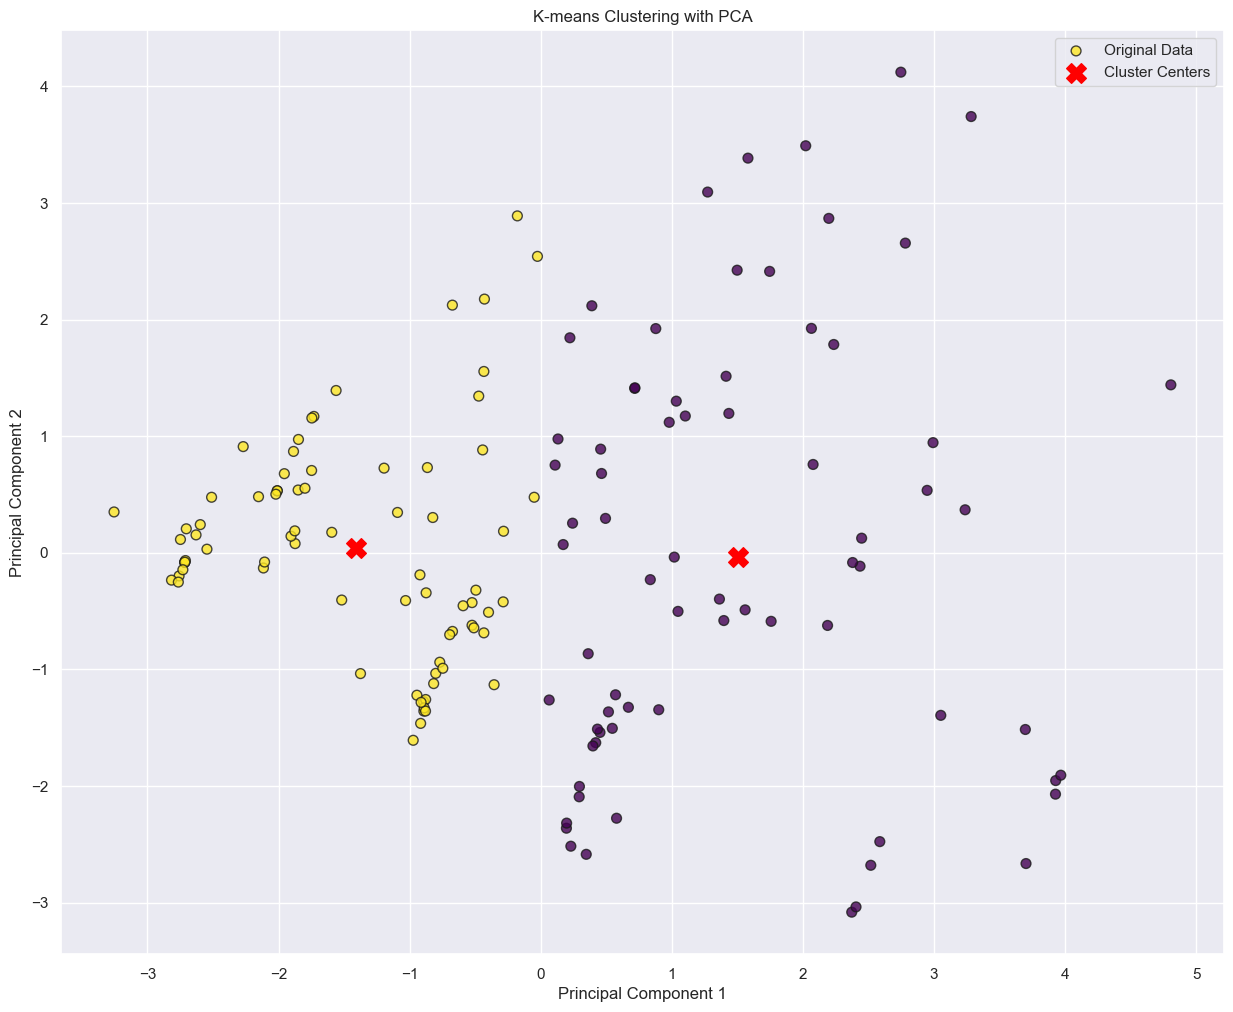

In [91]:
# Create a larger figure
plt.figure(figsize=(15, 12))

# Plot the K-means clustered data points
plt.scatter(data[:, 0], data[:, 1], c=predicted_labels, cmap='viridis', edgecolor='k', s=50, alpha=0.8, label='Original Data')

# Plot the cluster centers
plt.scatter(km_2_pca.cluster_centers_[:, 0], km_2_pca.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA')

# Show the legend
plt.legend()

# Show the plot
plt.show()

<blockquote> Grafik diatas adalah hasil dari clustering dengan sebanyak 2 cluster. Terlihat icon "X" yang berwarna merah adalah center cluster (centroid) lalu yang berwarna kuning dan Hitam adalah hasil data yang telah di clusterkan. terlihat mereka terpisah menjadi 2 bagian serta persebaran datanya berada di titik yang sesuai dengan persebaran datanya. Cluster berwarna ungu disini mewakili Label 1 dan kuning mewakili label 0</blockquote>

### 5 Clusters 📈

Seperti yang di jelaskan di tahap `K-means Here 🤩 Without PCA` alasan memilih n_cluster 5 adalah karena harapan kami, k-means dapat menebak untuk clustering berdasarkan tahun-nya

In [92]:
# Apply K-means clustering
km_5_pca = KMeans(n_clusters = 5, init = 'k-means++', n_init = 'auto', max_iter = 500, tol = 0.0001)
km_5_pca.fit(data)
predicted_labels = km_5_pca.labels_

C:\Users\rendi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [93]:
km_5_pca.cluster_centers_[:, 0], km_5_pca.cluster_centers_[:, 1]

(array([ 1.57204187,  0.31114393,  2.46783961, -2.19651864, -0.70329204]),
 array([-1.54280333,  1.24462405,  2.24685357,  0.34756001, -0.81434263]))

<blockquote> Nilai Akurasinya </blockquote> 

In [94]:
acc_km_5_pca = metrics.accuracy_score(Ground_truth_label_year,predicted_labels)
acc_km_5_pca # Akurasi

0.18791946308724833

<blockquote> Nilai Homogenitasnya </blockquote> 

In [95]:
homogenitas_km_5_pca = metrics.homogeneity_score(Ground_truth_label_year, predicted_labels)
homogenitas_km_5_pca

0.05444232126386132

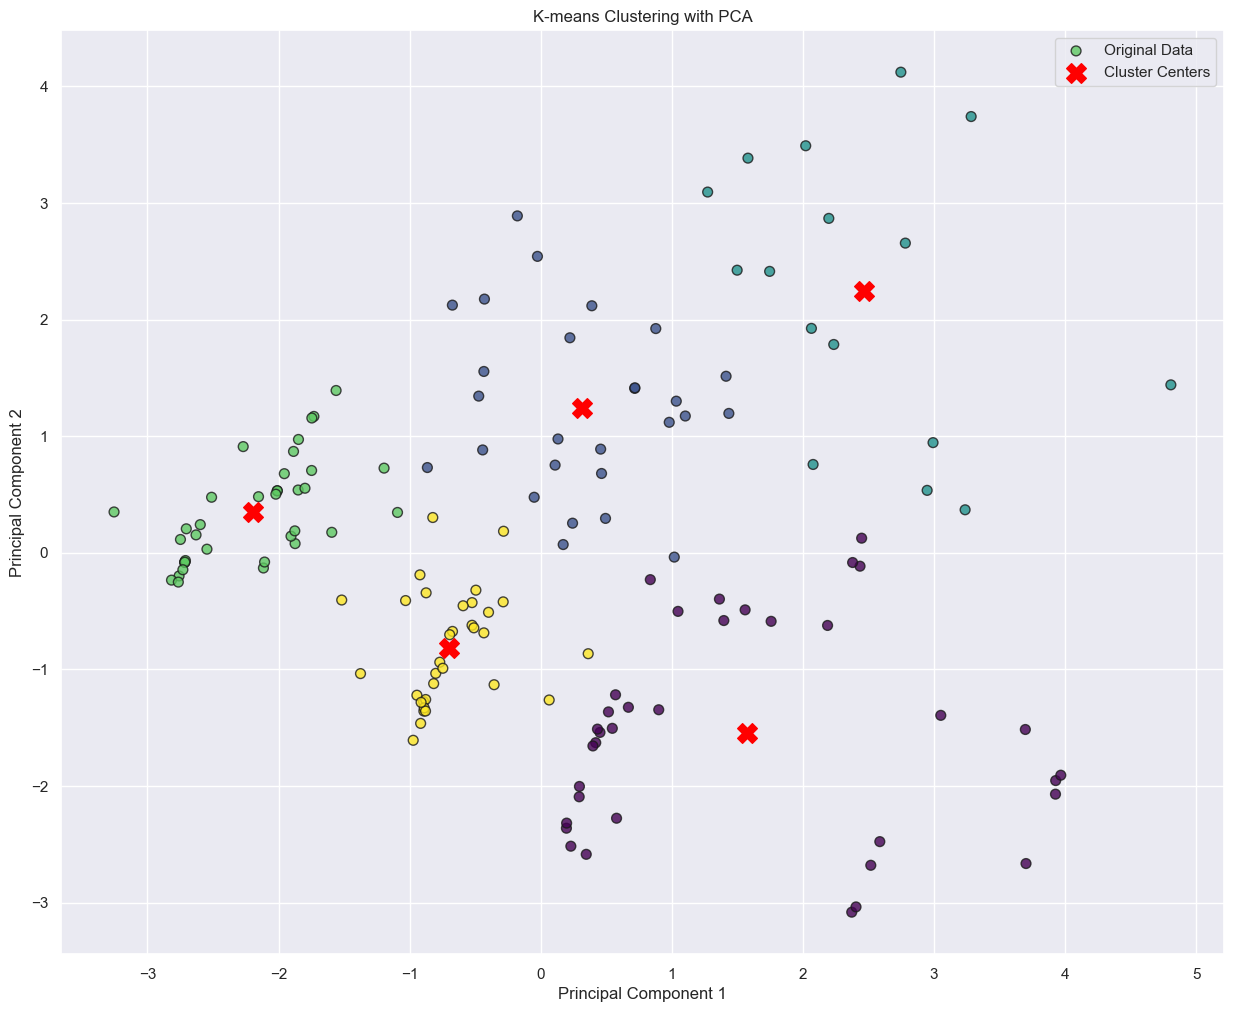

In [96]:
# Create a larger figure
plt.figure(figsize=(15, 12))

# Plot the K-means clustered data points
plt.scatter(data[:, 0], data[:, 1], c=predicted_labels, cmap='viridis', edgecolor='k', s=50, alpha=0.8, label='Original Data')

# Plot the cluster centers
plt.scatter(km_5_pca.cluster_centers_[:, 0], km_5_pca.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA')

# Show the legend
plt.legend()

# Show the plot
plt.show()

## SOM (Self-Organizing Maps)

Pada tahap SOM ini, kita akan abaikan semua nilai dan semua metric yang didapat diatas sebelumnya. karena SOM dan K-means adalah metode yang berbeda namun masih sama untuk clustering. dan bagusnya SOM tidak memelurkan PCA karena sudah bisa me-reduksi dirinya sendiri.

SOM memiliki 2 layer, input layer dan Neuron (Processing Unit Layer) Berbeda dengan K-means Clustering hanya 1 saja. SOM sendiri berarti ada 3 komponen penting: 
- Competition : Setiap Neuron atau Processing Unit itu berkompetisi untuk mempunyai weight(Jarak) terkecil dari neuron2 lainnya, yang dimana itu akan dinyatakan sebagai Centorid atau winning unit. Jarak tadi didapatkan dengan mencari nilai Euclidean Distance dari Input ke Setiap neuron.
- Cooperation(Kolaborasi atau Kerja Sama): Dimana setiap winning Neuron akan memiliki yang namanya neighborhood Neuoron. 
- Synaptic (Weight atau jarak antara input dengan Neuron atau Processing Unit) Adaption: Weight akan berubah setiap iterasi dilakukan. karena menyesuaikan dengan Centroid atau Winning unit nya.

| Nomor | Tahap                | Deskripsi                                                                                                                                                               |
|:-------:|:----------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|   1   | Inisialisasi Bobot   | Setiap unit pada peta SOM memiliki vektor bobot yang merepresentasikan lokasi di ruang fitur. Bobot ini diinisialisasi secara acak atau dengan menggunakan metode lain, seperti analisis komponen utama (PCA). |
|   2   | Seleksi Data         | Ambil satu sampel acak dari dataset sebagai vektor input untuk iterasi tertentu.                                                                                        |
|   3   | Kompetisi            | Hitung jarak (biasanya menggunakan Euclidean distance) antara vektor input dan semua vektor bobot unit SOM. Unit dengan bobot paling mendekati vektor input dianggap sebagai pemenang (BMU).         |
|   4   | Penyebaran           | Sebar atau tarik bobot unit BMU tersebut, serta bobot unit tetangganya, untuk lebih mendekati vektor input. Fungsi kerjasama ini menciptakan adaptasi global di peta.                       |
|   5   | Penyesuaian Bobot    | Sesuaikan bobot unit SOM sesuai dengan vektor input dan tetangganya. Bobot unit yang lebih dekat dengan BMU mengalami penyesuaian yang lebih besar.                                   |
|   6   | Iterasi              | Ulangi langkah-langkah 2-5 untuk seluruh dataset latih. Setiap iterasi memperbarui bobot unit SOM, dan proses ini dapat diulang sejumlah kali hingga konvergensi.                            |
|   7   | Pemetaan Tematik     | Setelah pelatihan selesai, peta SOM memberikan pemetaan tematik yang mencerminkan struktur data. Unit yang berdekatan pada peta memiliki bobot yang serupa, menciptakan kumpulan yang mewakili pola dalam data. |


Play with SOM here : https://justglowing-minisom-dashboard-dashboard-z8lkfu.streamlit.app/

### Library SOM

In [97]:
from minisom import MiniSom
from sklearn_som.som import SOM

### Data Used for Implement SOM

Menggunakan data standarisasi yang sama seperti sebelumnya namun kali ini adalah Metode SOM

In [98]:
X_data_std_SOM = scaler.fit_transform(df_selected)

### MiniSOM Here 🤩

#### Train Model SOM

In [99]:
som_shape = (2,2)

som = MiniSom(som_shape[0], som_shape[1], X_data_std_SOM.shape[1], sigma=0.5, learning_rate=0.05, neighborhood_function='gaussian', random_seed=7) # initialization of 6x6 SOM
som.train(X_data_std_SOM, 1000, verbose = True) # trains the SOM with 600 iterations

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 3.5049039600216396


<blockquote>Quantization error (atau disingkat sebagai Q.E.) adalah suatu metrik yang mengukur seberapa baik representasi titik data oleh neuron pemenang pada Self-Organizing Map (SOM). Nilai quantization error yang lebih rendah menunjukkan bahwa representasi SOM lebih baik atau lebih akurat.</blockquote>

<blockquote> Secara matematis, quantization error dihitung sebagai rata-rata jarak antara setiap titik data dengan bobot (weights) dari neuron pemenangnya. Dengan kata lain, semakin kecil nilai quantization error, semakin baik SOM dapat merepresentasikan distribusi data.</blockquote>



#### Memetakan data ke dalam klaster

In [100]:
winner_coordinates = np.array([som.winner(x) for x in X_data_std_SOM]).T
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
cluster_index = cluster_index + 1 # diplus 1 karena agar diawali dengan cluster index 1. karena cluster 0 gak enak di sebutnya.

#### Cek Kluster Terbanyak

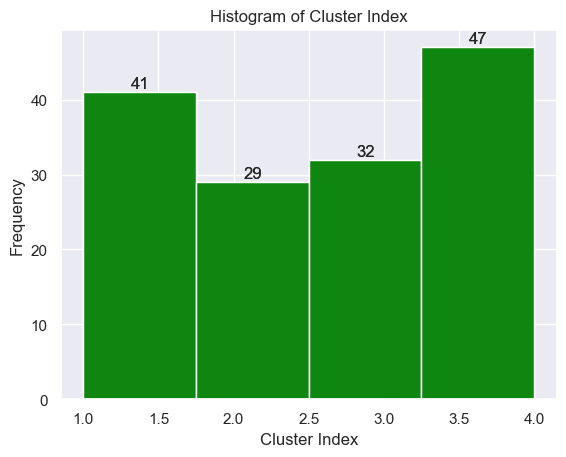

In [101]:
# Penggunaan sns.histplot
plt.figure()
sns.histplot(cluster_index, bins=4, color='green', kde=False)  # Jika kde=True, akan menambahkan kurva distribusi kernel

# Tambahkan label pada sumbu dan judul
plt.xlabel('Cluster Index')
plt.ylabel('Frequency')
plt.title('Histogram of Cluster Index')

# Tambahkan label pada setiap bar
for i, value in enumerate(sns.histplot(cluster_index, bins=4, color='green', kde=False).patches):
    plt.text(value.get_x() + value.get_width() / 2, value.get_height() + 0.1,
             f'{value.get_height():.0f}', ha='center', va='bottom')

plt.show()

Pada grafik diatas terlihat bahwa cluster 4 adalah Cluster dengan Keanggotaan terbanyak, lalu Cluster 1 juga kedua terbanyak. jumlahnya didapatkan dari hasil model SOM yang telah training terhadap data, dan mencari cluster_index. cluster_index berisikan nilai cluster dari seluruh data yang telah diinputkan

#### Visualisasi Klaster hasil SOM

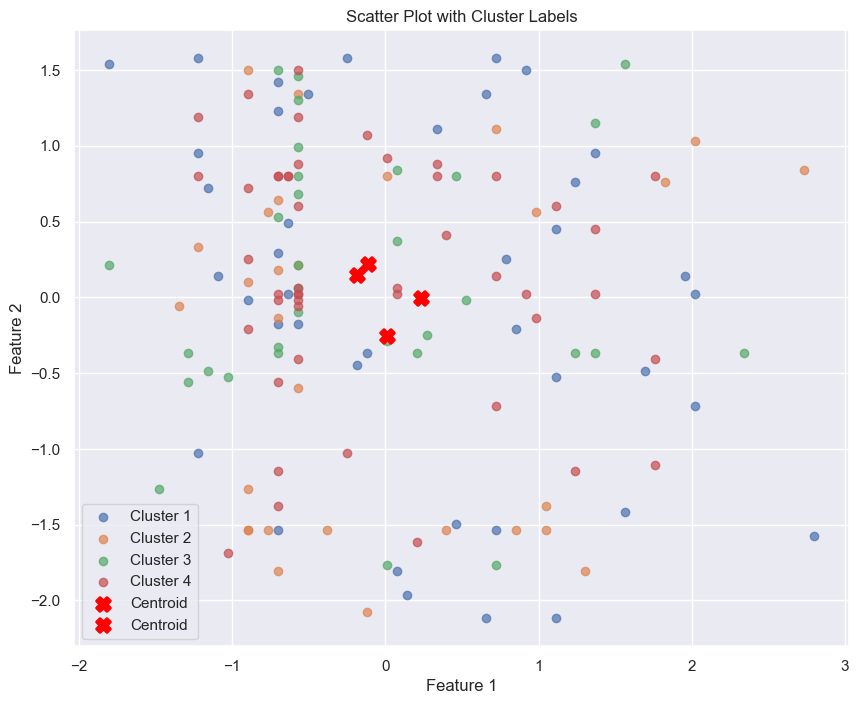

In [102]:
# Buat plot
plt.figure(figsize=(10, 8))
for c in np.unique(cluster_index):
    cluster_data = X_data_std_SOM[cluster_index == c]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {c}', alpha=.7)

# # Tambahkan keterangan pada setiap data
# for i, label in enumerate(cluster_index):
#     plt.text(X_data_std_SOM[i, 0], X_data_std_SOM[i, 1], str(label), fontsize=8, ha='right', va='bottom')
    
# Visualisasi centroid
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='X', s=100, linewidths=2, color='red', label='Centroid')

# Tambahkan label sumbu dan judul
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('Scatter Plot with Cluster Labels')

# Tampilkan legenda
plt.legend()

# Tampilkan plot
plt.show()

<blockquote> Terlihat pada hasil Clustering SOM, clusteringnya tidak baik dan tidak membentuk sebuah daerah Cluster. hal tersebut mungkin dikarenakan oleh akibat kesalahan dari Pengaturan hyperparameter seperti ukuran peta (jumlah neuron), sigma (parameter penyebaran), dan laju pembelajaran bisa mempengaruhi hasil klustering.  ataupun bisa karena ukuran dimensi data yang sangat tinggi dan seharusnya di reduksi ke 2 dimensi terlebih dahulu.

#### Analisis Hasil Bobot Neuron

<blockquote> Dalam Self-Organizing Map (SOM), jumlah neuron menentukan jumlah cluster yang dapat direpresentasikan oleh peta. Setiap neuron memiliki satu set bobot, dan jumlah neuron sesuai dengan jumlah cluster yang diinginkan. pada kasus kali ini, kami punya 4 cluster, maka akan memiliki 4 neuron. Dan setiap neuron tadi memiliki satu set bobot (weight). Jumlah bobot pada suatu neuron biasanya sama dengan dimensi fitur dari data yang dimasukkan ke dalam SOM. Kasus kali ini kami setiap data memiliki 19 fitur, maka setiap neuron akan memiliki 19 bobot </blockquote>

In [103]:
neuron_weights = som.get_weights()

# Jumlah neuron dalam setiap dimensi SOM
num_neurons_x, num_neurons_y, num_features = neuron_weights.shape

# Menampilkan seluruh bobot neuron
for i in range(num_neurons_x):
    for j in range(num_neurons_y):
        print(f"Neuron ({i}, {j}): {neuron_weights[i, j, :]}")

Neuron (0, 0): [ 0.2305673  -0.00581388  0.30937735 -0.27469359  0.14668716  0.39810449
 -0.05451216  0.53950113 -0.2183589   0.13302875  0.84940868 -0.96648577
  0.69777769 -0.13429398 -0.11045984  0.65635197  0.64336473 -0.82419992
  0.73371627]
Neuron (0, 1): [ 0.00785877 -0.25759518 -0.0223823  -0.3101782   0.47575906 -0.33939805
  0.73425704  0.24526154  1.06819378 -0.81343329 -0.31321158 -0.21516265
 -0.0547116  -0.08365673  0.23966402  0.33616001  0.85335818  0.6329581
  0.1516563 ]
Neuron (1, 0): [-0.1874465   0.14783389  0.11319002  0.15520205 -0.52600701 -0.2498398
  0.02773435  0.22668483  0.16831547 -0.12367414 -0.78008484  0.14485912
 -0.26756959 -1.0858517   0.61965378 -0.38243481 -0.83553863 -0.03954579
 -0.57033051]
Neuron (1, 1): [-0.11581945  0.22305874 -0.35389034  0.40312669 -0.11581549  0.00113615
 -0.3819103  -0.78500025 -0.64013968  0.57517732 -0.04564078  0.9046057
 -0.47426096  0.98394905 -0.36293199 -0.50998753 -0.50057085  0.41226513
 -0.31715731]


#### Analisis Korelasi Antar-Neuron

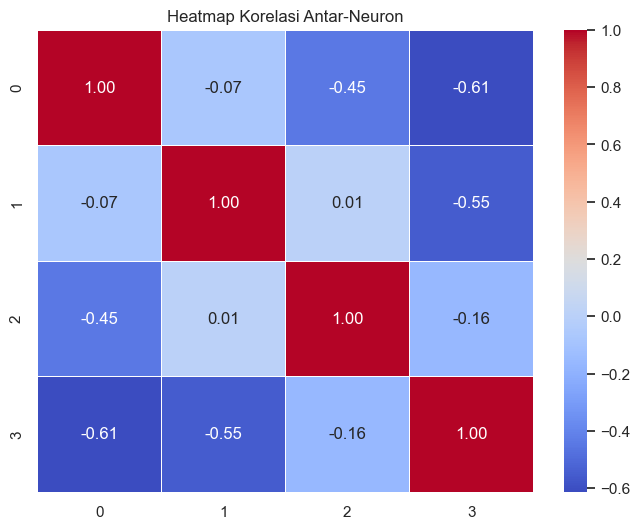

In [104]:
correlation_matrix = np.corrcoef(neuron_weights.reshape(-1, neuron_weights.shape[-1]))

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Antar-Neuron')
plt.show()

<blockQuote> Ternyata korelasi antar neuron pun tidak terlalu baik, seluruh korelasi yang ada adalah korelasi negatif, kecuali neuron 1 dengan 2 menghasilkan positif namun kecil sekali. Jika antar neuron tidak memiliki korelasi yang baik atau korelasinya negatif, hal ini dapat mengindikasikan bahwa bobot dari neuron-neuron tersebut tidak bergerak ke arah yang serupa selama proses pelatihan SOM. Korelasi negatif antar neuron dapat terjadi ketika beberapa neuron mendeteksi pola yang berlawanan atau kontras dalam data. Dalam konteks ini, bobot neuron seharusnya "belajar" untuk merepresentasikan pola atau struktur yang ada dalam data. Jika korelasi antar neuron rendah atau negatif, ini bisa berarti bahwa beberapa neuron mungkin tidak berhasil menyesuaikan diri dengan pola-pola tertentu atau mereka mungkin menanggapi pola yang berlawanan dengan cara yang tidak konsisten.

# Kesimpulan

| **Metode**                    | **Keunggulan**                                                                                           | **Pertimbangan**                                                                      |
|:------------------------------|:---------------------------------------------------------------------------------------------------------|:------------------------------------------------------------------------------------------|
| **Self-Organizing Map (SOM)** |  Memberikan representasi spasial data dalam bentuk peta, mempertahankan struktur topologis.            |  Sensitif terhadap ukuran peta dan parameter SOM lainnya. Interpretasi bobot neuron.    |
| **Principal Component Analysis (PCA)** |  Mengurangi dimensi data sambil mempertahankan informasi krusial. Cocok untuk menangani variabel yang saling terkorelasi. |  Mengasumsikan hubungan linear antar variabel. Interpretasi komponen utama bisa menantang. |
| **K-means Clustering**        |  Metode pengelompokan yang efisien dan mudah diimplementasikan. Cocok untuk data dengan cluster yang terbentuk secara geometris.  |  Sensitif terhadap penempatan awal centroid. Kurang efektif untuk cluster yang kompleks.|
| **Standard Scaler**           |  Menghilangkan perbedaan skala antar variabel, memastikan konsistensi dalam analisis.                   |  Penting untuk algoritma yang dipengaruhi oleh perbedaan skala.|

**Kesimpulan Umum**:
   - Menggabungkan SOM, PCA, K-means, dan Standard Scaler memberikan pendekatan analisis data yang komprehensif.
   - Standarisasi skala variabel dengan Standard Scaler membantu pengelompokan dan analisis dimensi yang lebih baik.
   - SOM memberikan pemahaman spasial, PCA membantu mengurangi dimensi, dan K-means memberikan wawasan pengelompokan.
   - Pilihan metode bergantung pada karakteristik data dan tujuan analisis, dengan penyesuaian parameter mungkin diperlukan untuk hasil optimal.